**Importing our Data**

In [29]:
import pandas as pd
path = "/content/train_file.csv"
df = pd.read_csv(path)

In [30]:
df.head(10)

,text,label,rating
0,They look good and stick good! I just do not like the rounded shape because I was always bumping...,positive,5
1,These stickers work like the review says they do. They stick on great and they stay on the phone...,positive,4
2,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,positive,5
3,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",positive,4
4,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",positive,4
5,These make using the home button easy. My daughter and I both like them. I would purchase them a...,positive,5
6,Came just as described.. It does not come unstuck and its cute! People ask where I got them from...,positive,4
7,it worked for the first week then it only charge my phone to 2negative%. it is a waste of money.,negative,1
8,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges w...",positive,3
9,This is a fantastic case. Very stylish and protects my phone. Easy access to all buttons and fea...,positive,4


In [4]:
df.label.value_counts()

positive    227
negative     72
Name: label, dtype: int64

In [5]:
df.rating.value_counts()

5    91
4    79
3    59
2    30
1    27
0    13
Name: rating, dtype: int64

In [6]:
mean = df['rating'].mean()
print("average rating:", mean)

average rating: 3.4615384615384617


In [7]:
df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df.to_csv(path, index=False)
df.head()

,text,label,rating
0,THEY LOOK GOOD AND STICK GOOD! I JUST DO NOT L...,POSITIVE,5
1,THESE STICKERS WORK LIKE THE REVIEW SAYS THEY ...,POSITIVE,4
2,THESE ARE AWESOME AND MAKE MY PHONE LOOK SO ST...,POSITIVE,5
3,ITEM ARRIVED IN GREAT TIME AND WAS IN PERFECT ...,POSITIVE,4
4,"AWESOME! STAYS ON, AND LOOKS GREAT. CAN BE USE...",POSITIVE,4


In [8]:
df_sorted = df.sort_values('text')

# View the sorted data
print(df_sorted)

# Write sorted data to a new file
df_sorted.to_csv(path, index=False)

                                                  text     label  rating
229  "THIS CABLE NOT RECOMMENDED FOR THIS DEVICE." ...  NEGATIVE       2
220  A GOOD INEXPENSIVE CABLE THAT WORKS LIKE THE O...  POSITIVE       5
210  A NOTE OF CAUTION FROM SOMEONE WHO OWNED AND U...  NEGATIVE       0
102  A VERYERY GOOD CAR CHARGER FOR YOUR PHONES, CH...  POSITIVE       3
144  AFTER 2 WEEKS MY CHARGER JUST FELL APART WHILE...  POSITIVE       4
..                                                 ...       ...     ...
42   WORKS GREAT. THE BLUE LED LIGHT IS A NICE TOUC...  POSITIVE       4
84   WORKS WELL. WE USE THIS FOR TRAVEL AND IT LIVE...  POSITIVE       4
162  WOW! WHAT A CUTE BATTERY CASE! I SAW A CHRISTI...  NEGATIVE       1
29   YO GET EXACTLY WHAT YOU ORDER IN A TIMELY FASH...  POSITIVE       5
113  YOU HAVE TO HOLD IT IN A CERTAIN PLACE IN OTHE...  NEGATIVE       1

[299 rows x 3 columns]


**Sentiment Analysis**

Before starting the sentiment analysis, it is necessary to define the input features and the labels. Here there is only one feature, which is the ‘review’. The label will be the ‘sentiments’. The goal of this project is to train a model that can output if a review is positive or negative.

In [12]:
X = df['text']
y = df['label']

** TRAIN AND TEST DATA** 

There are four quadrants in the confusion matrix, which are symbolized as below.

Precision recall
confusion matrix

True Positive (TP): The number of instances that were positive (+) and correctly classified as positive (+v)  
> You predicted a mail is a spam and it actually is.

False Negative (FN): The number of instances that were positive (+) and incorrectly classified as negative (-)It is also known as Type 2 Error.
> You predicted a mail is not spam and it actually is.

True Negative (TN): The number of instances that were negative (-) and correctly classified as (-).
> You predicted a mail is not spam and it actually is not.

False Positive (FP): The number of instances that were negative (-) and incorrectly classified as (+). This also known as Type 1 Error.
>You predicted a mail is not spam and it actually is.
To add a little clarity:

Upper Left: True Positives for correctly predicted event values.

Upper RIght: False Positives for incorrectly predicted event values.

Lower Left: False Negatives for correctly predicted no-event values. 

Lower Right: True Negatives for incorrectly predicted no-event values.

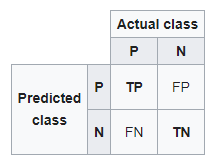

**Count Vectorizer**

I will use a count vectorizer to vectorize the text data in the review column (training feature for this project) and then use three different classification models from scikit-learn models. After that, to evaluate the model on this dataset find out the accuracy, confusion matrix, true positive rates, and true negative rates. Here are the steps.



1.   The first step is to split the dataset into training sets and testing sets.
2.   Vectorize the input feature that is out review column (both training and testing data) 
3. import the model from scikit learn library.
4. Find the accuracy score
5. find the true positive and true negative rates.

I will repeat this same process for three different classifiers now. The classifiers that will be used here are Logistic Regression, Support Vector Machine, and K Nearest Neighbor Classifier. I will summarise the results towards the end of this article.

**Logistic Regression**


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=24)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with CountVectorizer")
print("Accuracy Score:",lr_score)
#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_dtm)
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print(tpr_lr, tnr_lr)

Results for Logistic Regression with CountVectorizer
Accuracy Score: 0.74
7 29 10 104
0.9123 0.1944


<Axes: >

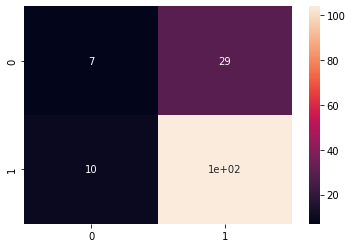

In [ ]:
import seaborn as sns
sns.heatmap(cm_lr, annot=True)

**Support Vector Machine**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.5, 
                                                    random_state=123)
#Vectorizing the text data
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn import svm
#Training the model
svcl = svm.SVC()
svcl.fit(ctmTr, y_train)
svcl_score = svcl.score(X_test_dtm, y_test)
print("Results for Support Vector Machine with CountVectorizer")
print("Accuracy Score:",svcl_score)
y_pred_sv = svcl.predict(X_test_dtm)
#Confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)

Results for Support Vector Machine with CountVectorizer
Accuracy Score: 0.74
0 39 0 111
1.0 0.0


<Axes: >

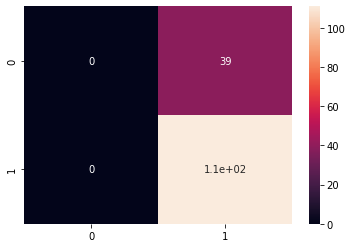

In [ ]:
import seaborn as sns
sns.heatmap(cm_sv, annot=True)

**K Nearest Neighbor**

In [15]:
#K NEAREST NEIGHBOUR

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    random_state=143)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(ctmTr, y_train)
knn_score = knn.score(X_test_dtm, y_test)
print("Results for KNN Classifier with CountVectorizer")
print("Accuracy Score:",knn_score)
y_pred_knn = knn.predict(X_test_dtm)
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

Results for KNN Classifier with CountVectorizer
Accuracy Score: 0.7666666666666667
3 33 2 112
0.9825 0.0833


<Axes: >

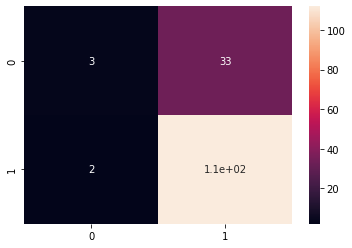

In [16]:
import seaborn as sns
sns.heatmap(cm_knn, annot=True)

**Precision**

Precision is the ration of numbers of True Positive to the total number of Predicted Positive. It measures, out of the total predicted positive, how many are actually positive.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

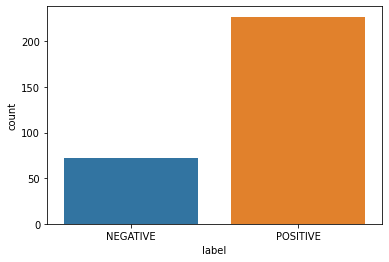

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
path = "/content/train_file.csv"
df = pd.read_csv(path)
 
# count plot on single categorical variable
sns.countplot(x ='label', data = df)
 
# Show the plot
plt.show()

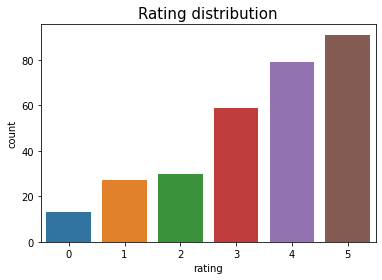

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
path = "/content/train_file.csv"
df = pd.read_csv(path)
 
# count plot on single categorical variable
sns.countplot(x ='rating', data = df)
plt.title('Rating distribution', fontsize=15)
# Show the plot
plt.show()

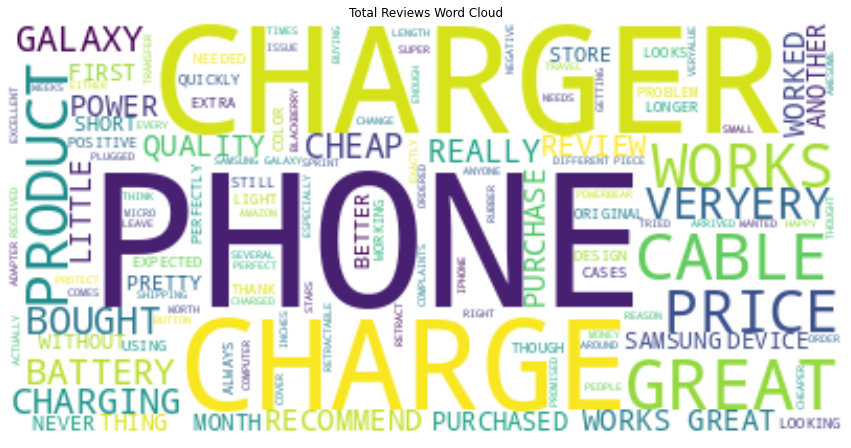

In [20]:
#mport all necesary libraries
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
 
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)
 
# Add some extra words ad hoc for our purpose
app_words = ['app', 'apps', 'application', 'game']
stopwords.update(app_words)
 
# join all reviews
text = " ".join(review for review in df.text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=200, min_word_length=5).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Cloud')
plt.show()

In [59]:
import pandas as pd
import numpy as np
import nltk
import string
#import fasttext
#import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
#plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

**Text Pre-Processing**

We will be focusing our attention on the “label” and “text” columns as they contains the most valuable qualitative information. Although we wouldn’t be applying any pre-processing steps to the “rating” column.

In [32]:
rws = df.loc[:, ['label', 'text','rating']]

**Tokenization**

Now that we have removed any non-English reviews let’s apply our tokenizer in order to split each individual word into a token. We will apply NLTK.word_tokenize() function to the “text” column and create a new column named “tokenized”.

In [33]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
rws['tokenized'] = rws['text'].apply(word_tokenize)
rws.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text,rating,tokenized
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,..."
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ...."


**Converting all Characters to Lowercase**

Transforming all words to lowercase is also a very common pre-processing step. In this case, we will once again append a new column named “lower” to the dataframe which will transform all the tokenized words into lowercase. However, because we have to iterate over multiple words we will use a simple for-loop within a lambda function to apply the “lower” function to each word.

In [35]:
rws['lower'] = rws['tokenized'].apply(lambda x: [word.lower() for word in x])
rws.head()

,label,text,rating,tokenized,lower
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,...","[they, look, good, and, stick, good, !, i, just, do, not, like, the, rounded, shape, because, i,..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, ., they, stick, on, great, and, they,..."
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, !, i, have, only, used, one, so, ..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, ., however, ,, i, ordered, th..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ...."


**Removing Punctuations**

Punctuation is often removed from our corpus since they serve little value once we begin to analyze our data. Continuing the previous pattern, we will create a new column which has the punctuation removed. We will again utilize a for-loop within a lambda function to iterate over the tokens but this time using an IF condition to only output alpha characters. It might be a little difficult to see but the tokenized “period” in the “ lower” column has been removed.

In [36]:
import string
punc = string.punctuation
rws['no_punc'] = rws['lower'].apply(lambda x: [word for word in x if word not in punc])
rws.head()

,label,text,rating,tokenized,lower,no_punc
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,...","[they, look, good, and, stick, good, !, i, just, do, not, like, the, rounded, shape, because, i,...","[they, look, good, and, stick, good, i, just, do, not, like, the, rounded, shape, because, i, wa..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, ., they, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, they, stick, on, great, and, they, st..."
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, !, i, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, i, have, only, used, one, so, far..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, ., however, ,, i, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, however, i, ordered, these, b..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, stays, on, and, looks, great, can, be, used, on, multiple, apple, products, especially..."


**Removing Stopwords**

Stopwords are typically useless words and do not add much meaning to a sentence. In the English language common stopwords include “you, he, she, in, a, has, are, etc.”. First, we need to import the NLTK stopwords library and set our stopwords to “english”. We are going to add a new column “no_stopwords” which will remove the stopwords from the “no_punc” column since it has been tokenized, had been converted to lowercase and punctuation was removed. Once again a for-loop within a lambda function will iterate over the tokens in “no_punc” and only return the tokens which do not exist in our “stop_words” variable.

In [37]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
rws['stopwords_removed'] = rws['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
rws.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,rating,tokenized,lower,no_punc,stopwords_removed
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,...","[they, look, good, and, stick, good, !, i, just, do, not, like, the, rounded, shape, because, i,...","[they, look, good, and, stick, good, i, just, do, not, like, the, rounded, shape, because, i, wa...","[look, good, stick, good, like, rounded, shape, always, bumping, siri, kept, popping, irritating..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, ., they, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, they, stick, on, great, and, they, st...","[stickers, work, like, review, says, stick, great, stay, phone, super, stylish, share, sister]"
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, !, i, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, i, have, only, used, one, so, far...","[awesome, make, phone, look, stylish, used, one, far, almost, year, believe, one, year, great, q..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, ., however, ,, i, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, however, i, ordered, these, b...","[item, arrived, great, time, perfect, condition, however, ordered, buttons, great, deal, include..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, stays, on, and, looks, great, can, be, used, on, multiple, apple, products, especially...","[awesome, stays, looks, great, used, multiple, apple, products, especially, nails, helps, elevat..."


**Stemming and Lemmatization**

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.

Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming.

First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

In [38]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('averaged_perceptron_tagger')
rws['pos_tags'] = rws['stopwords_removed'].apply(nltk.tag.pos_tag)
rws.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,label,text,rating,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,...","[they, look, good, and, stick, good, !, i, just, do, not, like, the, rounded, shape, because, i,...","[they, look, good, and, stick, good, i, just, do, not, like, the, rounded, shape, because, i, wa...","[look, good, stick, good, like, rounded, shape, always, bumping, siri, kept, popping, irritating...","[(look, VB), (good, JJ), (stick, RB), (good, JJ), (like, IN), (rounded, JJ), (shape, NN), (alway..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, ., they, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, they, stick, on, great, and, they, st...","[stickers, work, like, review, says, stick, great, stay, phone, super, stylish, share, sister]","[(stickers, NNS), (work, VBP), (like, IN), (review, NN), (says, VBZ), (stick, JJ), (great, JJ), ..."
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, !, i, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, i, have, only, used, one, so, far...","[awesome, make, phone, look, stylish, used, one, far, almost, year, believe, one, year, great, q...","[(awesome, JJ), (make, VBP), (phone, NN), (look, NN), (stylish, NN), (used, VBD), (one, CD), (fa..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, ., however, ,, i, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, however, i, ordered, these, b...","[item, arrived, great, time, perfect, condition, however, ordered, buttons, great, deal, include...","[(item, NN), (arrived, VBD), (great, JJ), (time, NN), (perfect, JJ), (condition, NN), (however, ..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, stays, on, and, looks, great, can, be, used, on, multiple, apple, products, especially...","[awesome, stays, looks, great, used, multiple, apple, products, especially, nails, helps, elevat...","[(awesome, JJ), (stays, NNS), (looks, VBZ), (great, JJ), (used, JJ), (multiple, NN), (apple, NN)..."


We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. Finally, we apply NLTK’s word lemmatizer.

In [39]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
rws['wordnet_pos'] = rws['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
rws.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,label,text,rating,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,...","[they, look, good, and, stick, good, !, i, just, do, not, like, the, rounded, shape, because, i,...","[they, look, good, and, stick, good, i, just, do, not, like, the, rounded, shape, because, i, wa...","[look, good, stick, good, like, rounded, shape, always, bumping, siri, kept, popping, irritating...","[(look, VB), (good, JJ), (stick, RB), (good, JJ), (like, IN), (rounded, JJ), (shape, NN), (alway...","[(look, v), (good, a), (stick, r), (good, a), (like, n), (rounded, a), (shape, n), (always, r), ..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, ., they, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, they, stick, on, great, and, they, st...","[stickers, work, like, review, says, stick, great, stay, phone, super, stylish, share, sister]","[(stickers, NNS), (work, VBP), (like, IN), (review, NN), (says, VBZ), (stick, JJ), (great, JJ), ...","[(stickers, n), (work, v), (like, n), (review, n), (says, v), (stick, a), (great, a), (stay, n),..."
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, !, i, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, i, have, only, used, one, so, far...","[awesome, make, phone, look, stylish, used, one, far, almost, year, believe, one, year, great, q...","[(awesome, JJ), (make, VBP), (phone, NN), (look, NN), (stylish, NN), (used, VBD), (one, CD), (fa...","[(awesome, a), (make, v), (phone, n), (look, n), (stylish, n), (used, v), (one, n), (far, r), (a..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, ., however, ,, i, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, however, i, ordered, these, b...","[item, arrived, great, time, perfect, condition, however, ordered, buttons, great, deal, include...","[(item, NN), (arrived, VBD), (great, JJ), (time, NN), (perfect, JJ), (condition, NN), (however, ...","[(item, n), (arrived, v), (great, a), (time, n), (perfect, a), (condition, n), (however, r), (or..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, stays, on, and, looks, great, can, be, used, on, multiple, apple, products, especially...","[awesome, stays, looks, great, used, multiple, apple, products, especially, nails, helps, elevat...","[(awesome, JJ), (stays, NNS), (looks, VBZ), (great, JJ), (used, JJ), (multiple, NN), (apple, NN)...","[(awesome, a), (stays, n), (looks, v), (great, a), (used, a), (multiple, n), (apple, n), (produc..."


Now we can apply NLTK’s word lemmatizer within our trusty list comprehension. Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

In [40]:
wnl = WordNetLemmatizer()
rws['lemmatized'] = rws['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
rws.head()

,label,text,rating,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,positive,They look good and stick good! I just do not like the rounded shape because I was always bumping...,5,"[They, look, good, and, stick, good, !, I, just, do, not, like, the, rounded, shape, because, I,...","[they, look, good, and, stick, good, !, i, just, do, not, like, the, rounded, shape, because, i,...","[they, look, good, and, stick, good, i, just, do, not, like, the, rounded, shape, because, i, wa...","[look, good, stick, good, like, rounded, shape, always, bumping, siri, kept, popping, irritating...","[(look, VB), (good, JJ), (stick, RB), (good, JJ), (like, IN), (rounded, JJ), (shape, NN), (alway...","[(look, v), (good, a), (stick, r), (good, a), (like, n), (rounded, a), (shape, n), (always, r), ...","[look, good, stick, good, like, rounded, shape, always, bump, siri, keep, pop, irritate, buy, pr..."
1,positive,These stickers work like the review says they do. They stick on great and they stay on the phone...,4,"[These, stickers, work, like, the, review, says, they, do, ., They, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, ., they, stick, on, great, and, they,...","[these, stickers, work, like, the, review, says, they, do, they, stick, on, great, and, they, st...","[stickers, work, like, review, says, stick, great, stay, phone, super, stylish, share, sister]","[(stickers, NNS), (work, VBP), (like, IN), (review, NN), (says, VBZ), (stick, JJ), (great, JJ), ...","[(stickers, n), (work, v), (like, n), (review, n), (says, v), (stick, a), (great, a), (stay, n),...","[sticker, work, like, review, say, stick, great, stay, phone, super, stylish, share, sister]"
2,positive,These are awesome and make my phone look so stylish! I have only used one so far and have had it...,5,"[These, are, awesome, and, make, my, phone, look, so, stylish, !, I, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, !, i, have, only, used, one, so, ...","[these, are, awesome, and, make, my, phone, look, so, stylish, i, have, only, used, one, so, far...","[awesome, make, phone, look, stylish, used, one, far, almost, year, believe, one, year, great, q...","[(awesome, JJ), (make, VBP), (phone, NN), (look, NN), (stylish, NN), (used, VBD), (one, CD), (fa...","[(awesome, a), (make, v), (phone, n), (look, n), (stylish, n), (used, v), (one, n), (far, r), (a...","[awesome, make, phone, look, stylish, use, one, far, almost, year, believe, one, year, great, qu..."
3,positive,"Item arrived in great time and was in perfect condition. However, I ordered these buttons becaus...",4,"[Item, arrived, in, great, time, and, was, in, perfect, condition, ., However, ,, I, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, ., however, ,, i, ordered, th...","[item, arrived, in, great, time, and, was, in, perfect, condition, however, i, ordered, these, b...","[item, arrived, great, time, perfect, condition, however, ordered, buttons, great, deal, include...","[(item, NN), (arrived, VBD), (great, JJ), (time, NN), (perfect, JJ), (condition, NN), (however, ...","[(item, n), (arrived, v), (great, a), (time, n), (perfect, a), (condition, n), (however, r), (or...","[item, arrive, great, time, perfect, condition, however, order, button, great, deal, include, fr..."
4,positive,"awesome! stays on, and looks great. can be used on multiple apple products. especially having na...",4,"[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, !, stays, on, ,, and, looks, great, ., can, be, used, on, multiple, apple, products, ....","[awesome, stays, on, and, looks, great, can, be, used, on, multiple, apple, products, especially...","[awesome, stays, looks, great, used, multiple, apple, products, especially, nails, helps, elevat...","[(awesome, JJ), (stays, NNS), (looks, VBZ), (great, JJ), (used, JJ), (multiple, NN), 

Lastly, we are going to save this work into a pickle file for further data analysis

Our final dataset contains numerous columns but the last column “lemmatized”, contained our final cleansed list of words. We are going to overwrite our existing dataframe because we are only interested in the “rating” and “lemmatized” columns.

In [41]:
rws.to_pickle('/content/clean.pkl')

In [42]:
import pickle
with open('clean.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [43]:
df = df[['rating', 'lemmatized']]
df.head()

,rating,lemmatized
0,5,"[look, good, stick, good, like, rounded, shape, always, bump, siri, keep, pop, irritate, buy, pr..."
1,4,"[sticker, work, like, review, say, stick, great, stay, phone, super, stylish, share, sister]"
2,5,"[awesome, make, phone, look, stylish, use, one, far, almost, year, believe, one, year, great, qu..."
3,4,"[item, arrive, great, time, perfect, condition, however, order, button, great, deal, include, fr..."
4,4,"[awesome, stay, look, great, used, multiple, apple, product, especially, nail, help, elevate, key]"


**Sentiment Analysis**

Sentiment analysis is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string but our “lemmatized” column is currently a list. Let’s convert the list into a string.


In [44]:
df['lemmatized_string'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,rating,lemmatized,lemmatized_string
0,5,"[look, good, stick, good, like, rounded, shape, always, bump, siri, keep, pop, irritate, buy, pr...",look good stick good like rounded shape always bump siri keep pop irritate buy product like
1,4,"[sticker, work, like, review, say, stick, great, stay, phone, super, stylish, share, sister]",sticker work like review say stick great stay phone super stylish share sister
2,5,"[awesome, make, phone, look, stylish, use, one, far, almost, year, believe, one, year, great, qu...",awesome make phone look stylish use one far almost year believe one year great quality
3,4,"[item, arrive, great, time, perfect, condition, however, order, button, great, deal, include, fr...",item arrive great time perfect condition however order button great deal include free screen pro...
4,4,"[awesome, stay, look, great, used, multiple, apple, product, especially, nail, help, elevate, key]",awesome stay look great used multiple apple product especially nail help elevate key


Now we can pass the “lemmatized_string” column into the Sentiment() function to calculate sentiment. Since we have the “rating” column, we can validate how well the sentiment analysis was able to determine the writer’s attitude. That said, we do see obvious errors as rating #5 has a rating of 5 but a fairly low sentiment.

In [45]:
from textblob import TextBlob
df['sentiment'] = df['lemmatized_string'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,rating,lemmatized,lemmatized_string,sentiment
0,5,"[look, good, stick, good, like, rounded, shape, always, bump, siri, keep, pop, irritate, buy, pr...",look good stick good like rounded shape always bump siri keep pop irritate buy product like,0.700000
1,4,"[sticker, work, like, review, say, stick, great, stay, phone, super, stylish, share, sister]",sticker work like review say stick great stay phone super stylish share sister,0.544444
2,5,"[awesome, make, phone, look, stylish, use, one, far, almost, year, believe, one, year, great, qu...",awesome make phone look stylish use one far almost year believe one year great quality,0.600000
3,4,"[item, arrive, great, time, perfect, condition, however, order, button, great, deal, include, fr...",item arrive great time perfect condition however order button great deal include free screen pro...,0.600000
4,4,"[awesome, stay, look, great, used, multiple, apple, product, especially, nail, help, elevate, key]",awesome stay look great used multiple apple product especially nail help elevate key,0.360000




When comparing a histogram of our sentiment, we can see that the vast majority of our derived sentiment rating is overwhelmingly positive. When we compare this against the “ratings” column, we can see a similar pattern emerge. Not only do we feel comfortable in the accuracy of the sentiment analysis but we can see that the overall consumers attitude about the product is very positive. 

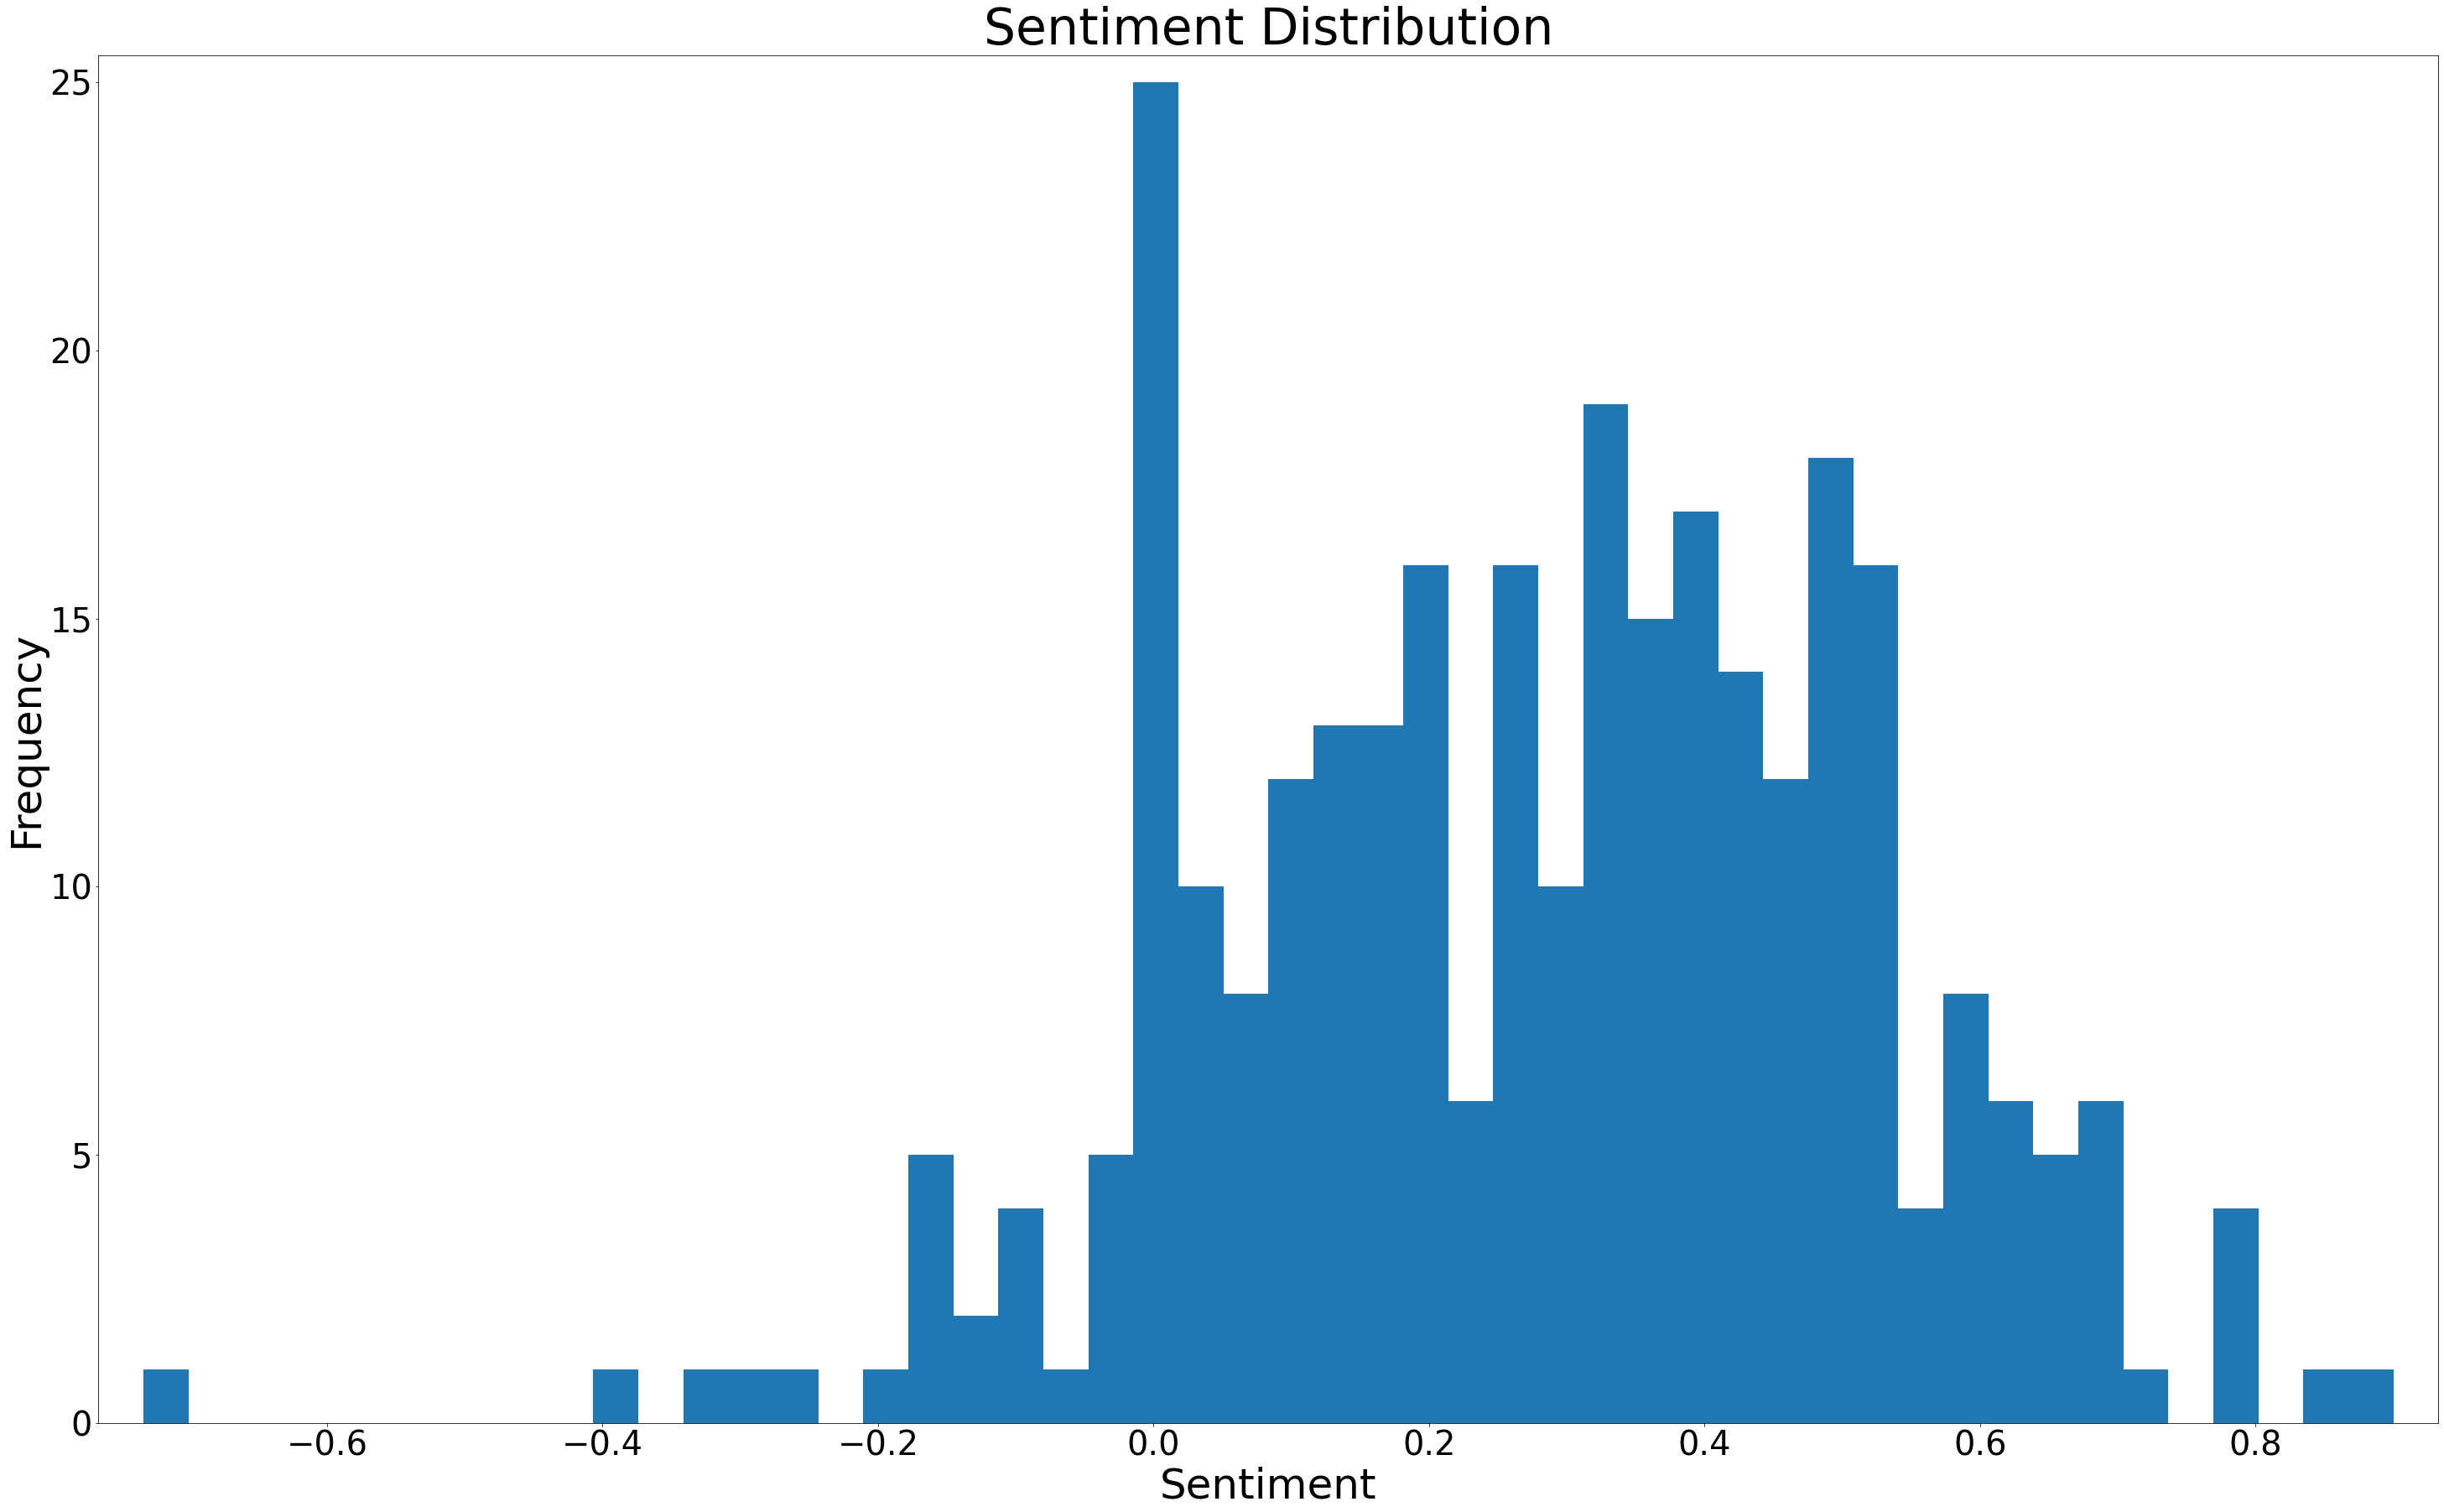

In [46]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

Let’s create two additional features of “word_count” to determine the number of words per review and “review_len” to determine the number of letters per review.



In [48]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemmatized_string'].astype(str).apply(len)
df.head()

,rating,lemmatized,lemmatized_string,sentiment,word_count,review_len
0,5,"[look, good, stick, good, like, rounded, shape, always, bump, siri, keep, pop, irritate, buy, pr...",look good stick good like rounded shape always bump siri keep pop irritate buy product like,0.700000,16,91
1,4,"[sticker, work, like, review, say, stick, great, stay, phone, super, stylish, share, sister]",sticker work like review say stick great stay phone super stylish share sister,0.544444,13,78
2,5,"[awesome, make, phone, look, stylish, use, one, far, almost, year, believe, one, year, great, qu...",awesome make phone look stylish use one far almost year believe one year great quality,0.600000,15,86
3,4,"[item, arrive, great, time, perfect, condition, however, order, button, great, deal, include, fr...",item arrive great time perfect condition however order button great deal include free screen pro...,0.600000,28,172
4,4,"[awesome, stay, look, great, used, multiple, apple, product, especially, nail, help, elevate, key]",awesome stay look great used multiple apple product especially nail help elevate key,0.360000,13,84


Although the differences are not significantly large it seems the longest reviews based on the count of letters and words seem to be negative and neutral. It seems disgruntled employees typically provide significantly more detail in their reviews. This result is not uncommon as humans have a tendency to complain in detail but praise in brief. This can be further confirmed by examining the correlation matrix below. Both ratings and sentiment have a negative correlation with “review_len” and “word_count”. This would explain the inverse relationship as the count of letters and words per review increases the overall rating and sentiment decreases. However, once again the correlation is rather small nevertheless negative.

**Average Number of Letters per Rating Distribution**

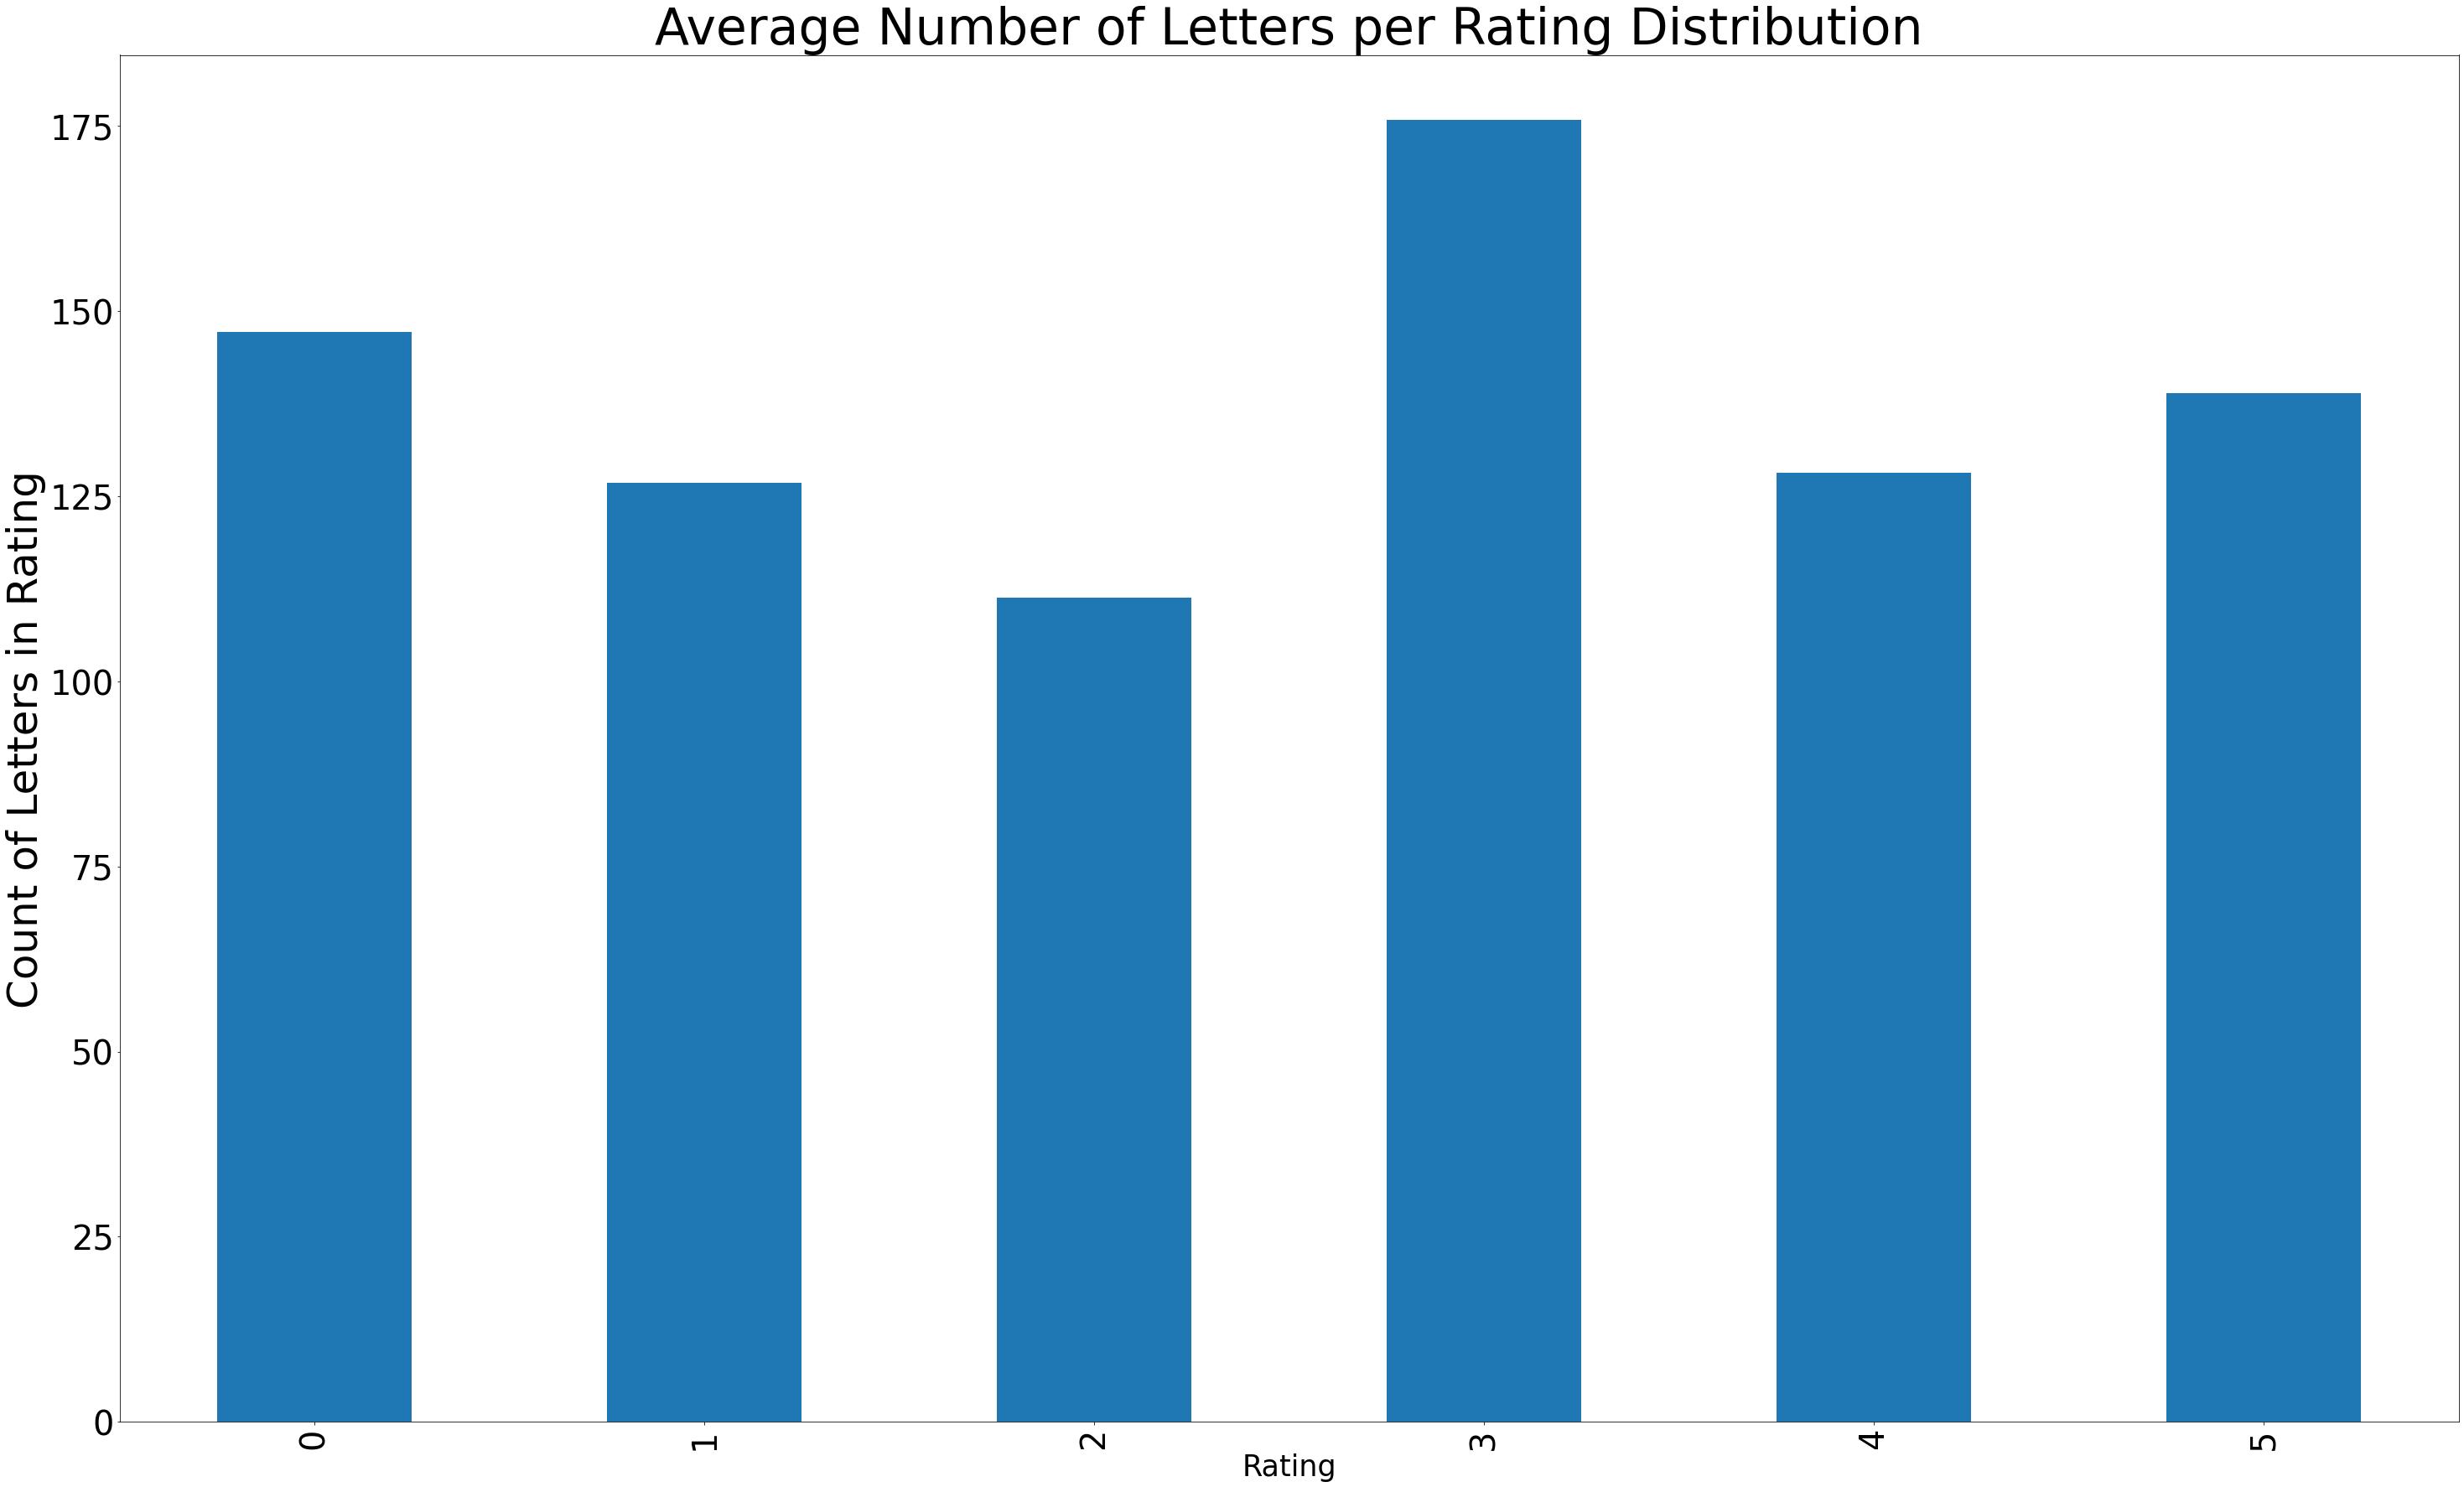

In [49]:
letter_avg = df.groupby('rating')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=60)
plt.show()


**Average Number of words per Rating Distribution**

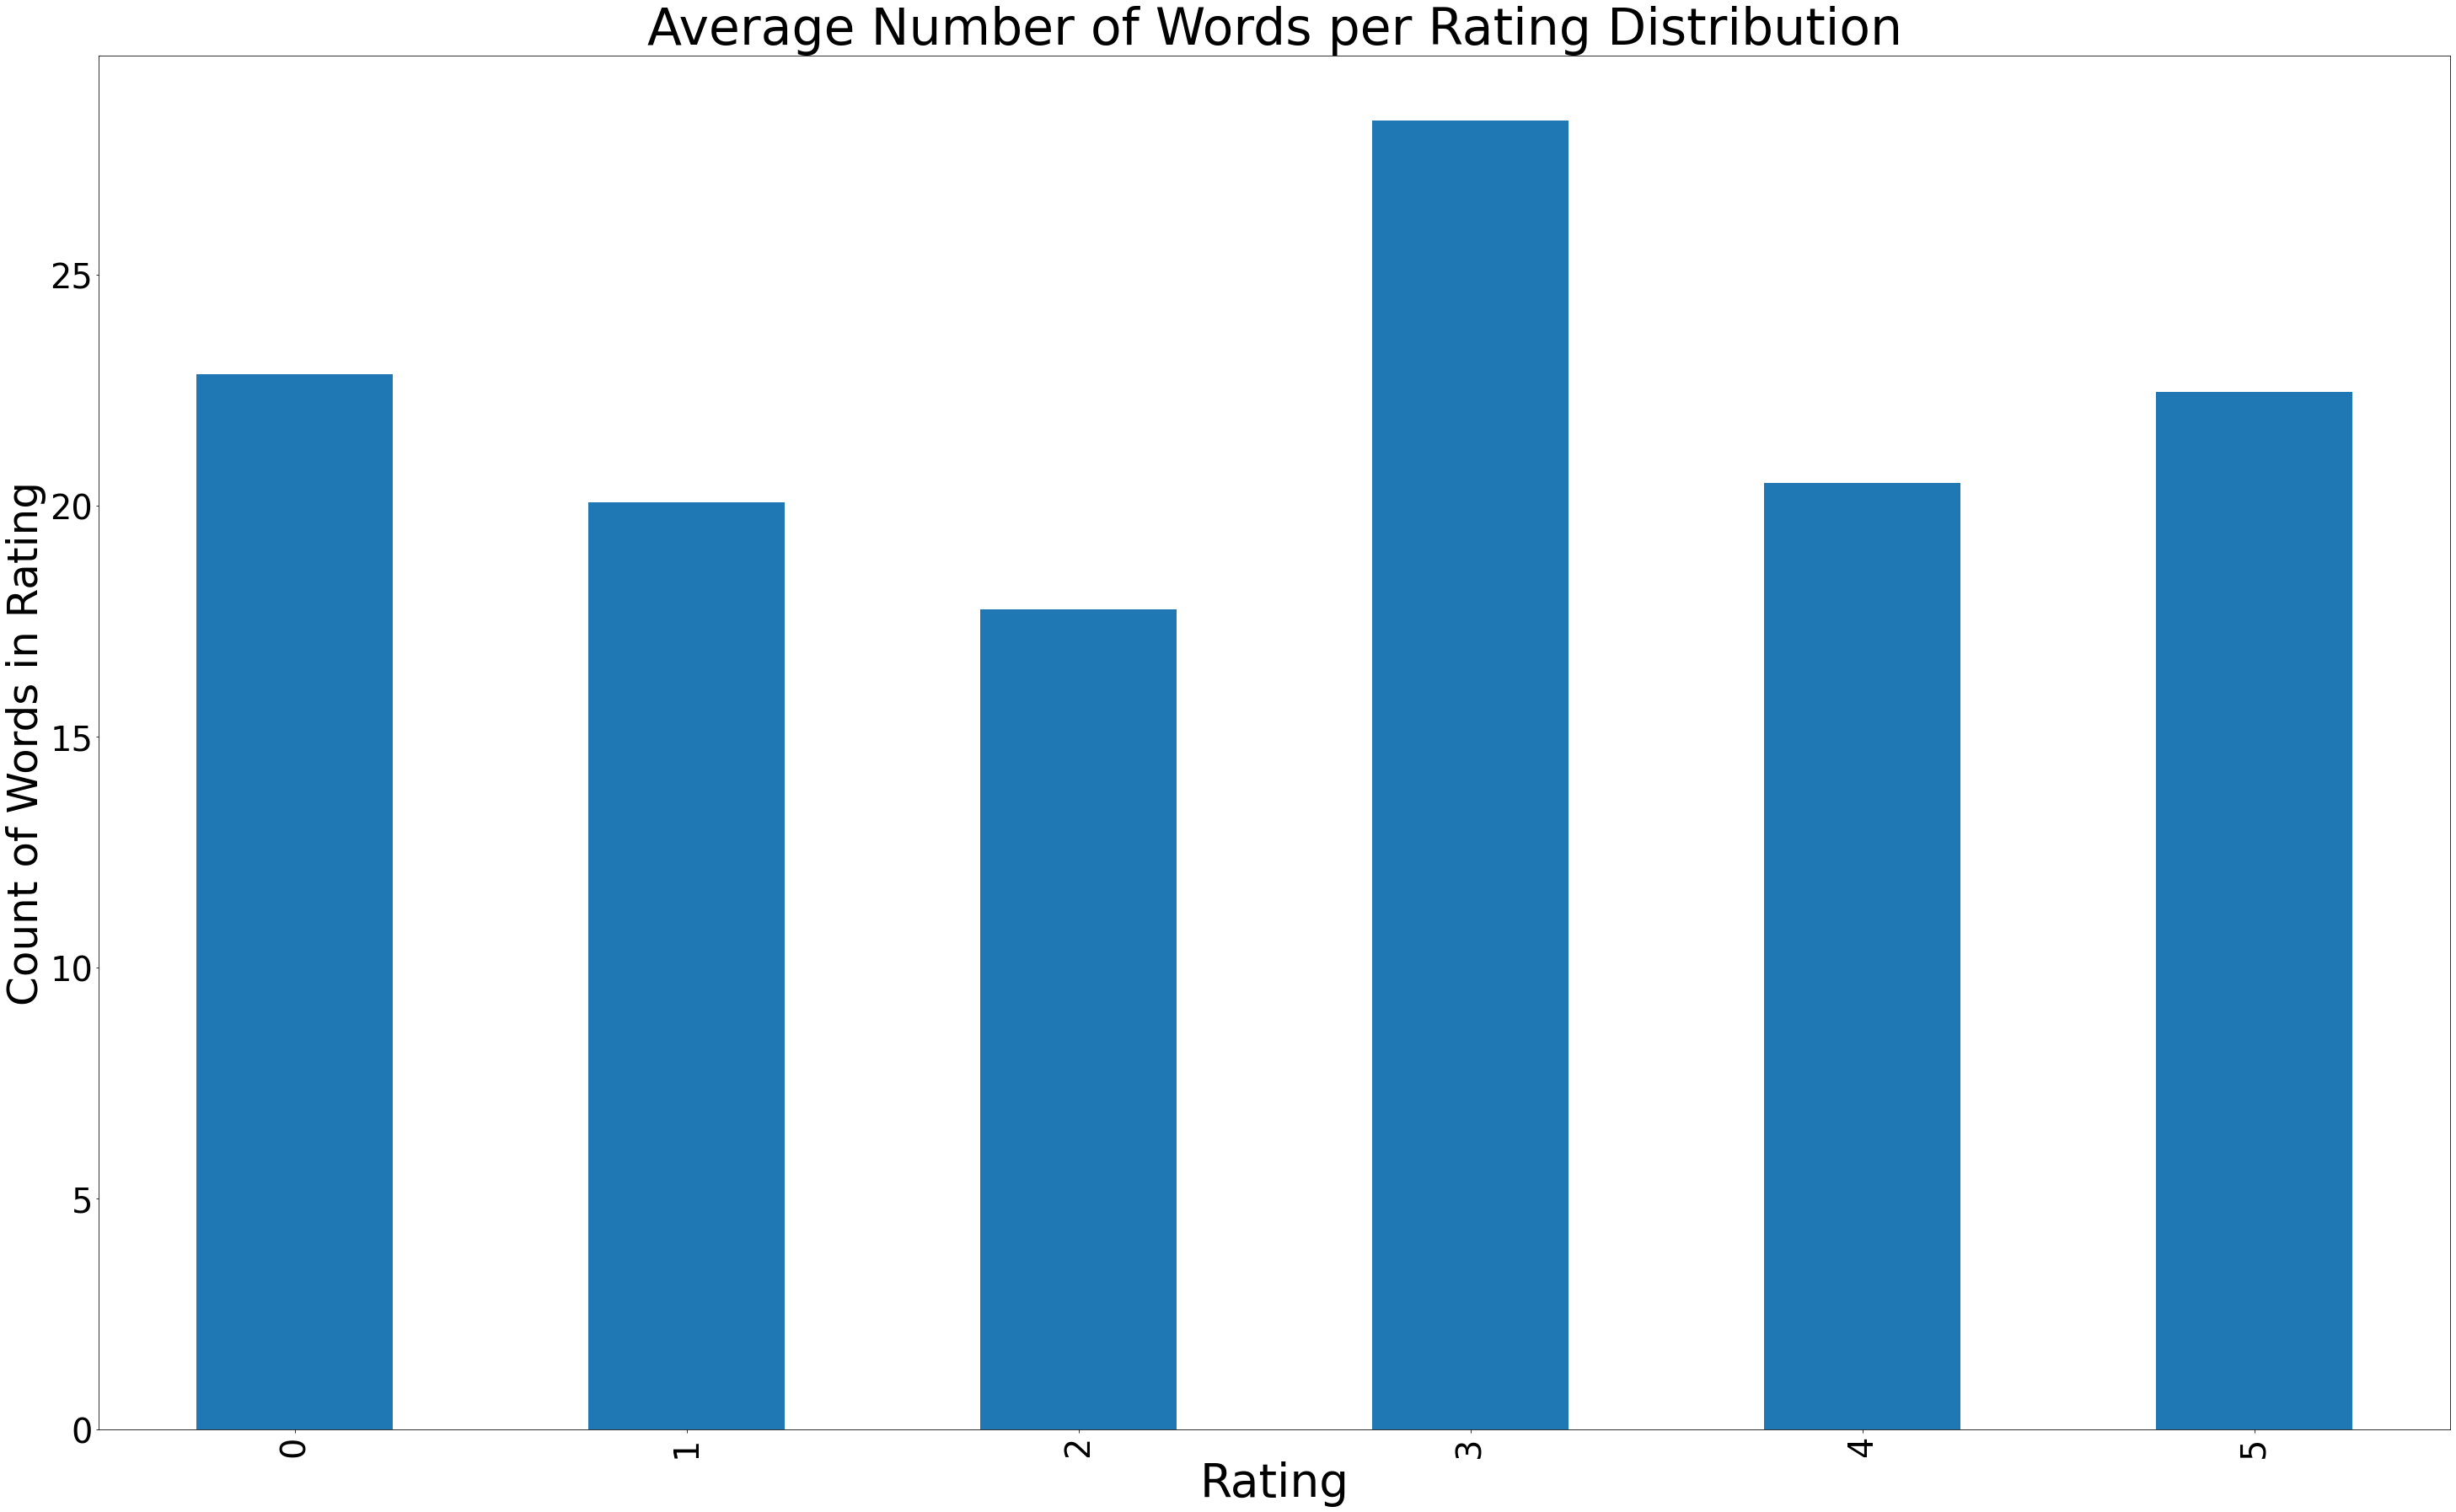

In [50]:
word_avg = df.groupby('rating')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=55)
plt.ylabel('Count of Words in Rating', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Rating Distribution', fontsize=60)
plt.show()

<Axes: >

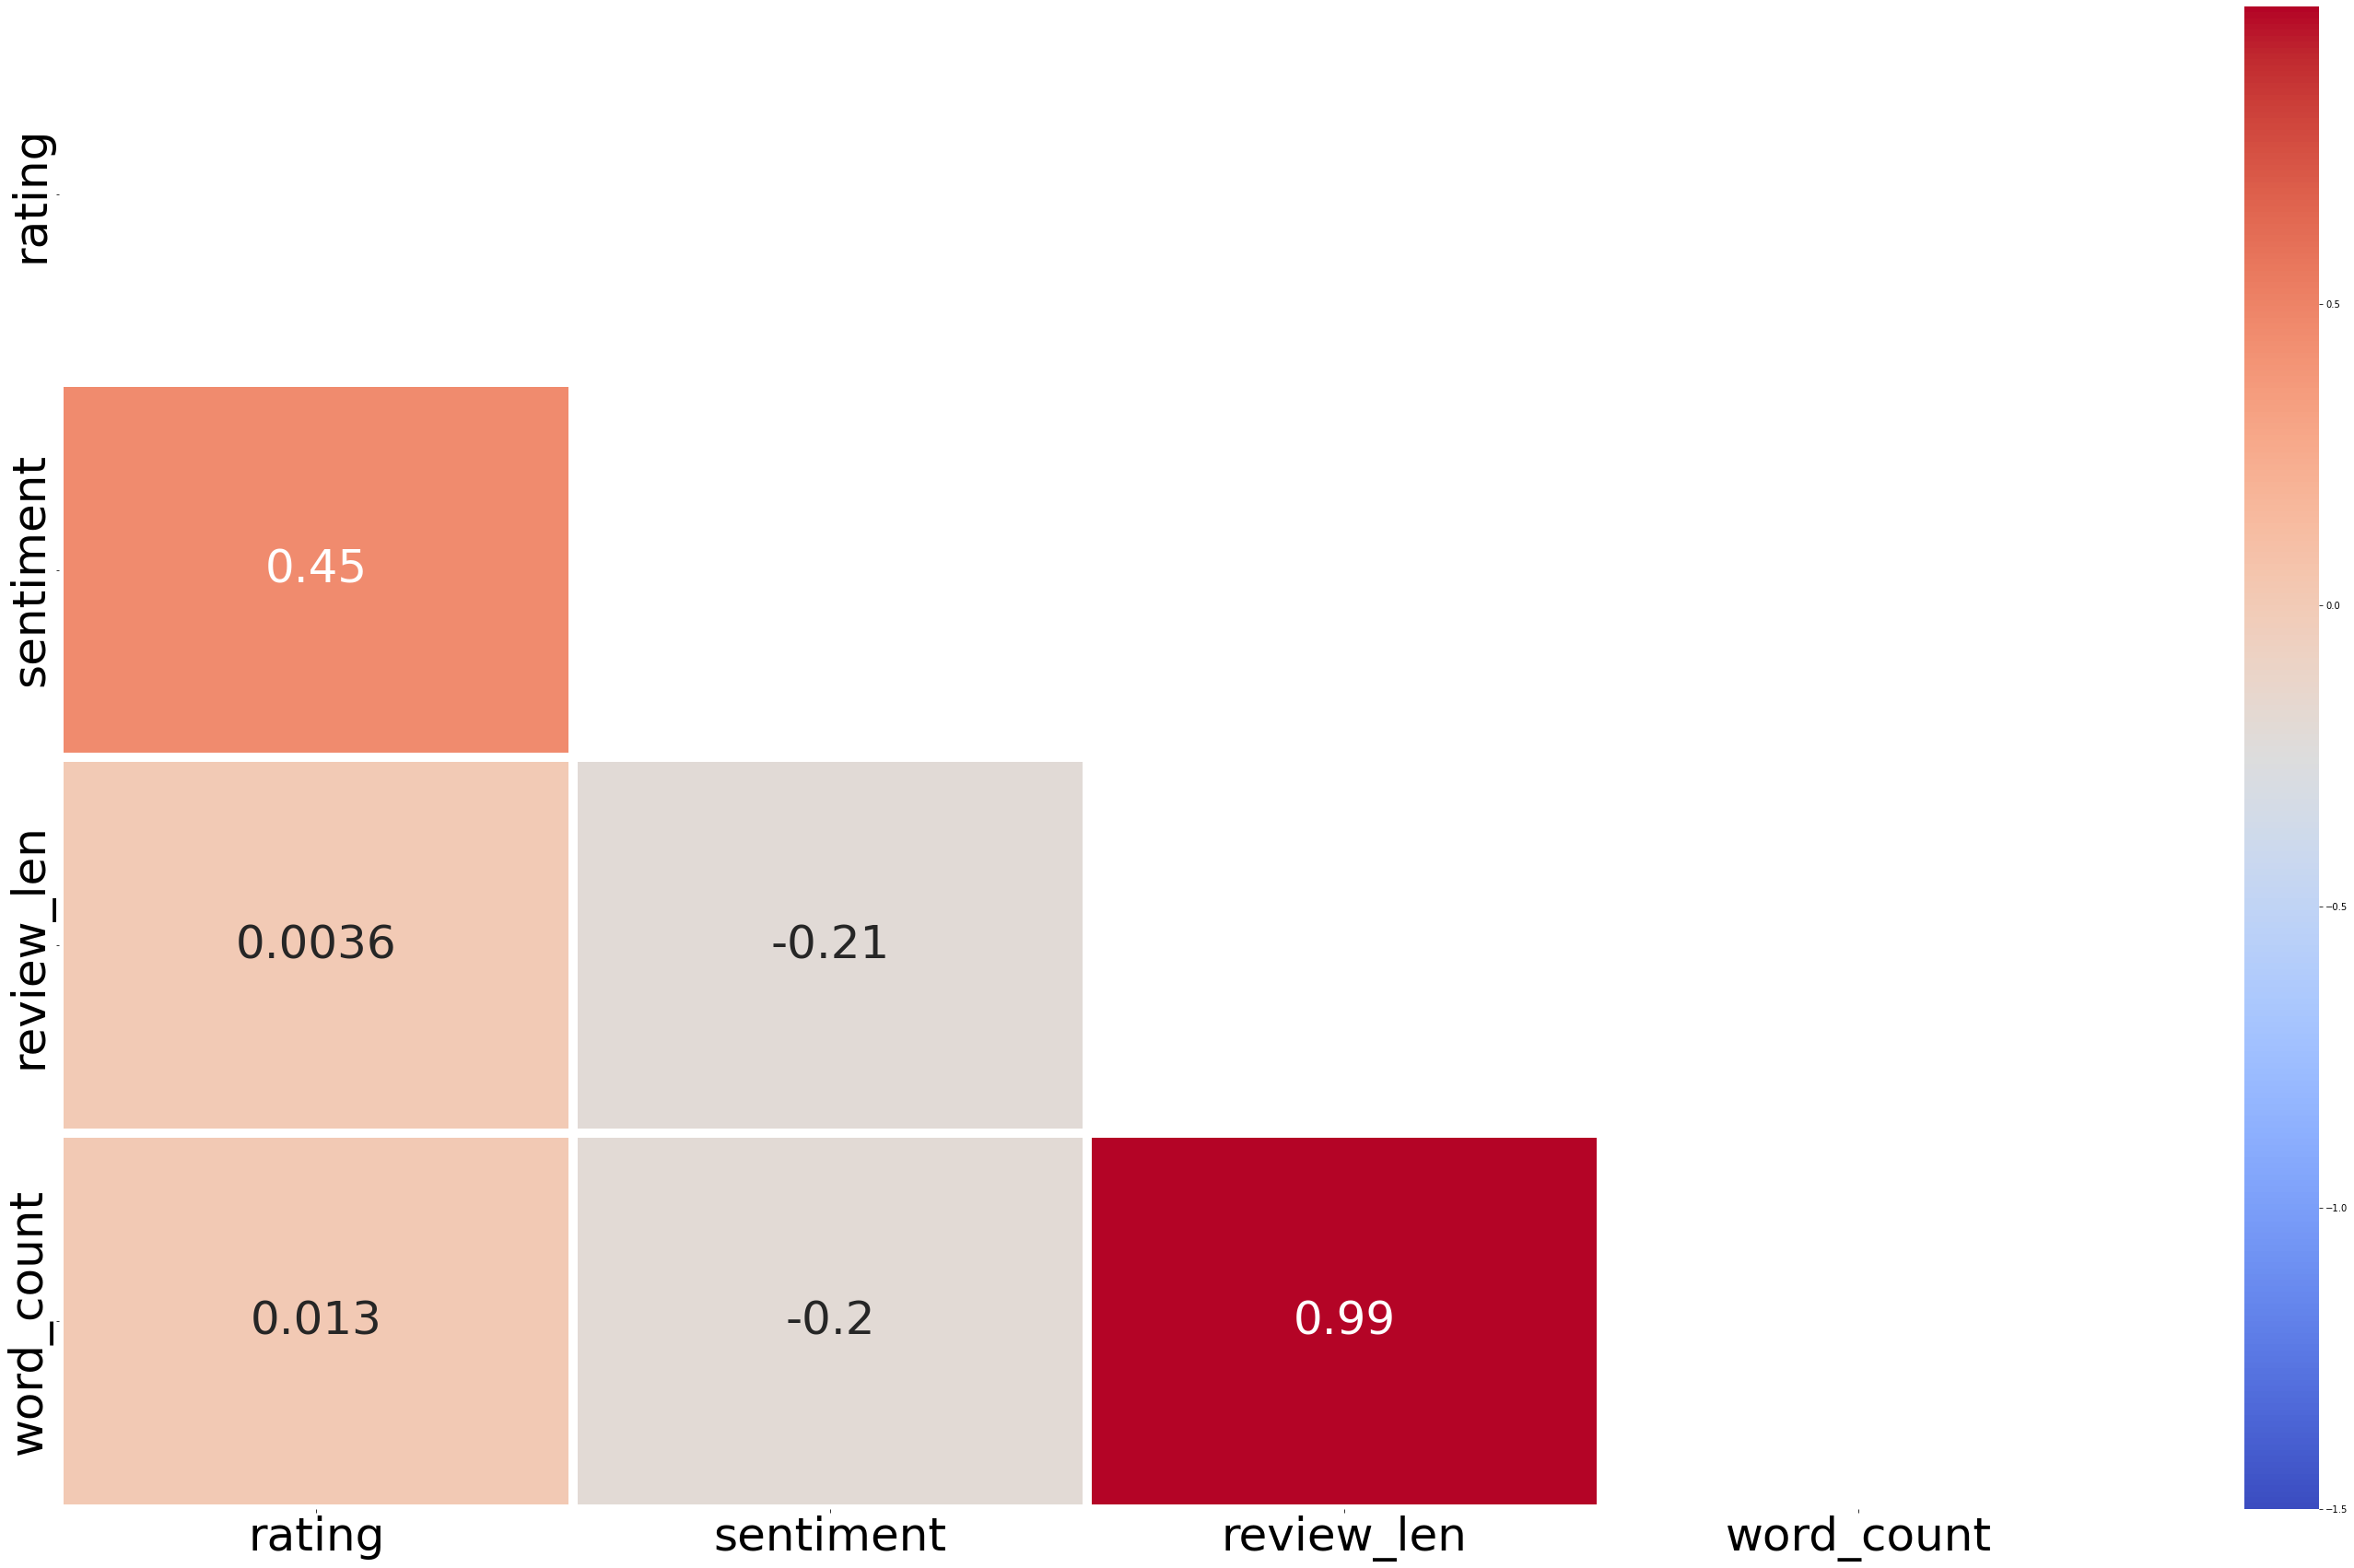

In [51]:
correlation = df[['rating','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 50}, linewidths=10, vmin=-1.5, 
            mask=mask)

**Term Frequency Analysis**

Let’s take an in-depth look at the actual reviews themselves. What are the most common words? What are the most common words by rating?
NLTK has a great library named “FreqDist” which allows us to determine the count of the most common terms in our corpus. First, we need to convert our individual lists of tokenized reviews into a comprehensive list of iterable tokens which stores all the reviews together. Finally, we pass FreqDist() the “allwords” object and apply the “most_common(100)” function to obtain the 100 most common words.


In [71]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


In [52]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['look', 'good', 'stick', 'good', 'like', 'rounded', 'shape', 'always', 'bump', 'siri', 'keep', 'pop', 'irritate', 'buy', 'product', 'like', 'sticker', 'work', 'like', 'review', 'say', 'stick', 'great', 'stay', 'phone', 'super', 'stylish', 'share', 'sister', 'awesome', 'make', 'phone', 'look', 'stylish', 'use', 'one', 'far', 'almost', 'year', 'believe', 'one', 'year', 'great', 'quality', 'item', 'arrive', 'great', 'time', 'perfect', 'condition', 'however', 'order', 'button', 'great', 'deal', 'include', 'free', 'screen', 'protector', 'never', 'receive', 'one', 'though', 'big', 'deal', 'would', 'nice', 'get', 'since', 'claim', 'come', 'one', 'awesome', 'stay', 'look', 'great', 'used', 'multiple', 'apple', 'product', 'especially', 'nail', 'help', 'elevate', 'key', 'make', 'use', 'home', 'button', 'easy', 'daughter', 'like', 'would', 'purchase', 'well', 'worth', 'price', 'come', 'describe', '..', 'come', 'unstuck', 'cute', 'people', 'ask', 'get', 'great', 'driving', 'work', 'first', 'week'

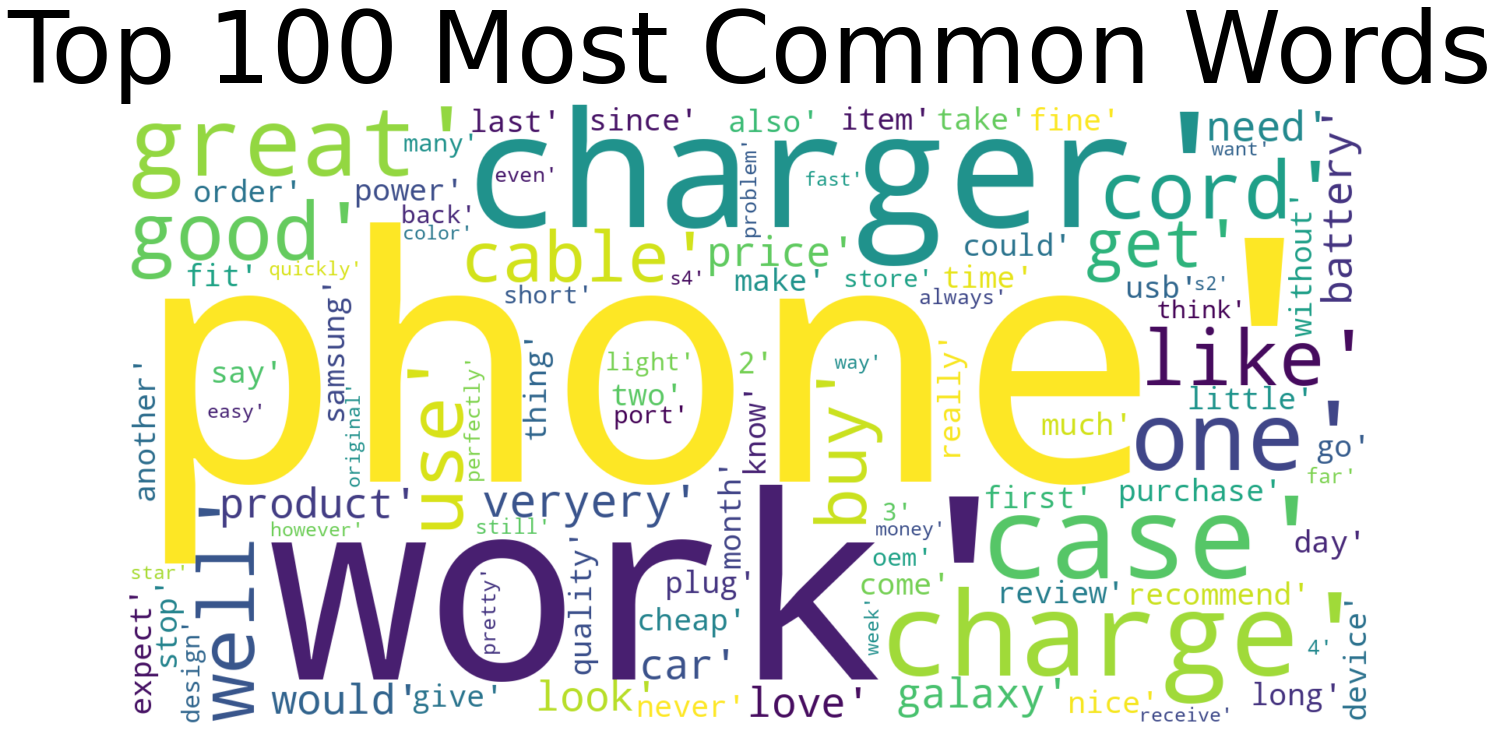

In [54]:
from nltk.probability import FreqDist
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

The results of the term frequency analysis certainly supports the overall positive sentiment of the reviews. Terms such as “Great”, “Work”, “love”, “Good” point to a positive review where buyers liked the product.
That said, a company can always improve therefore, let’s examine the most common words for each review rating.



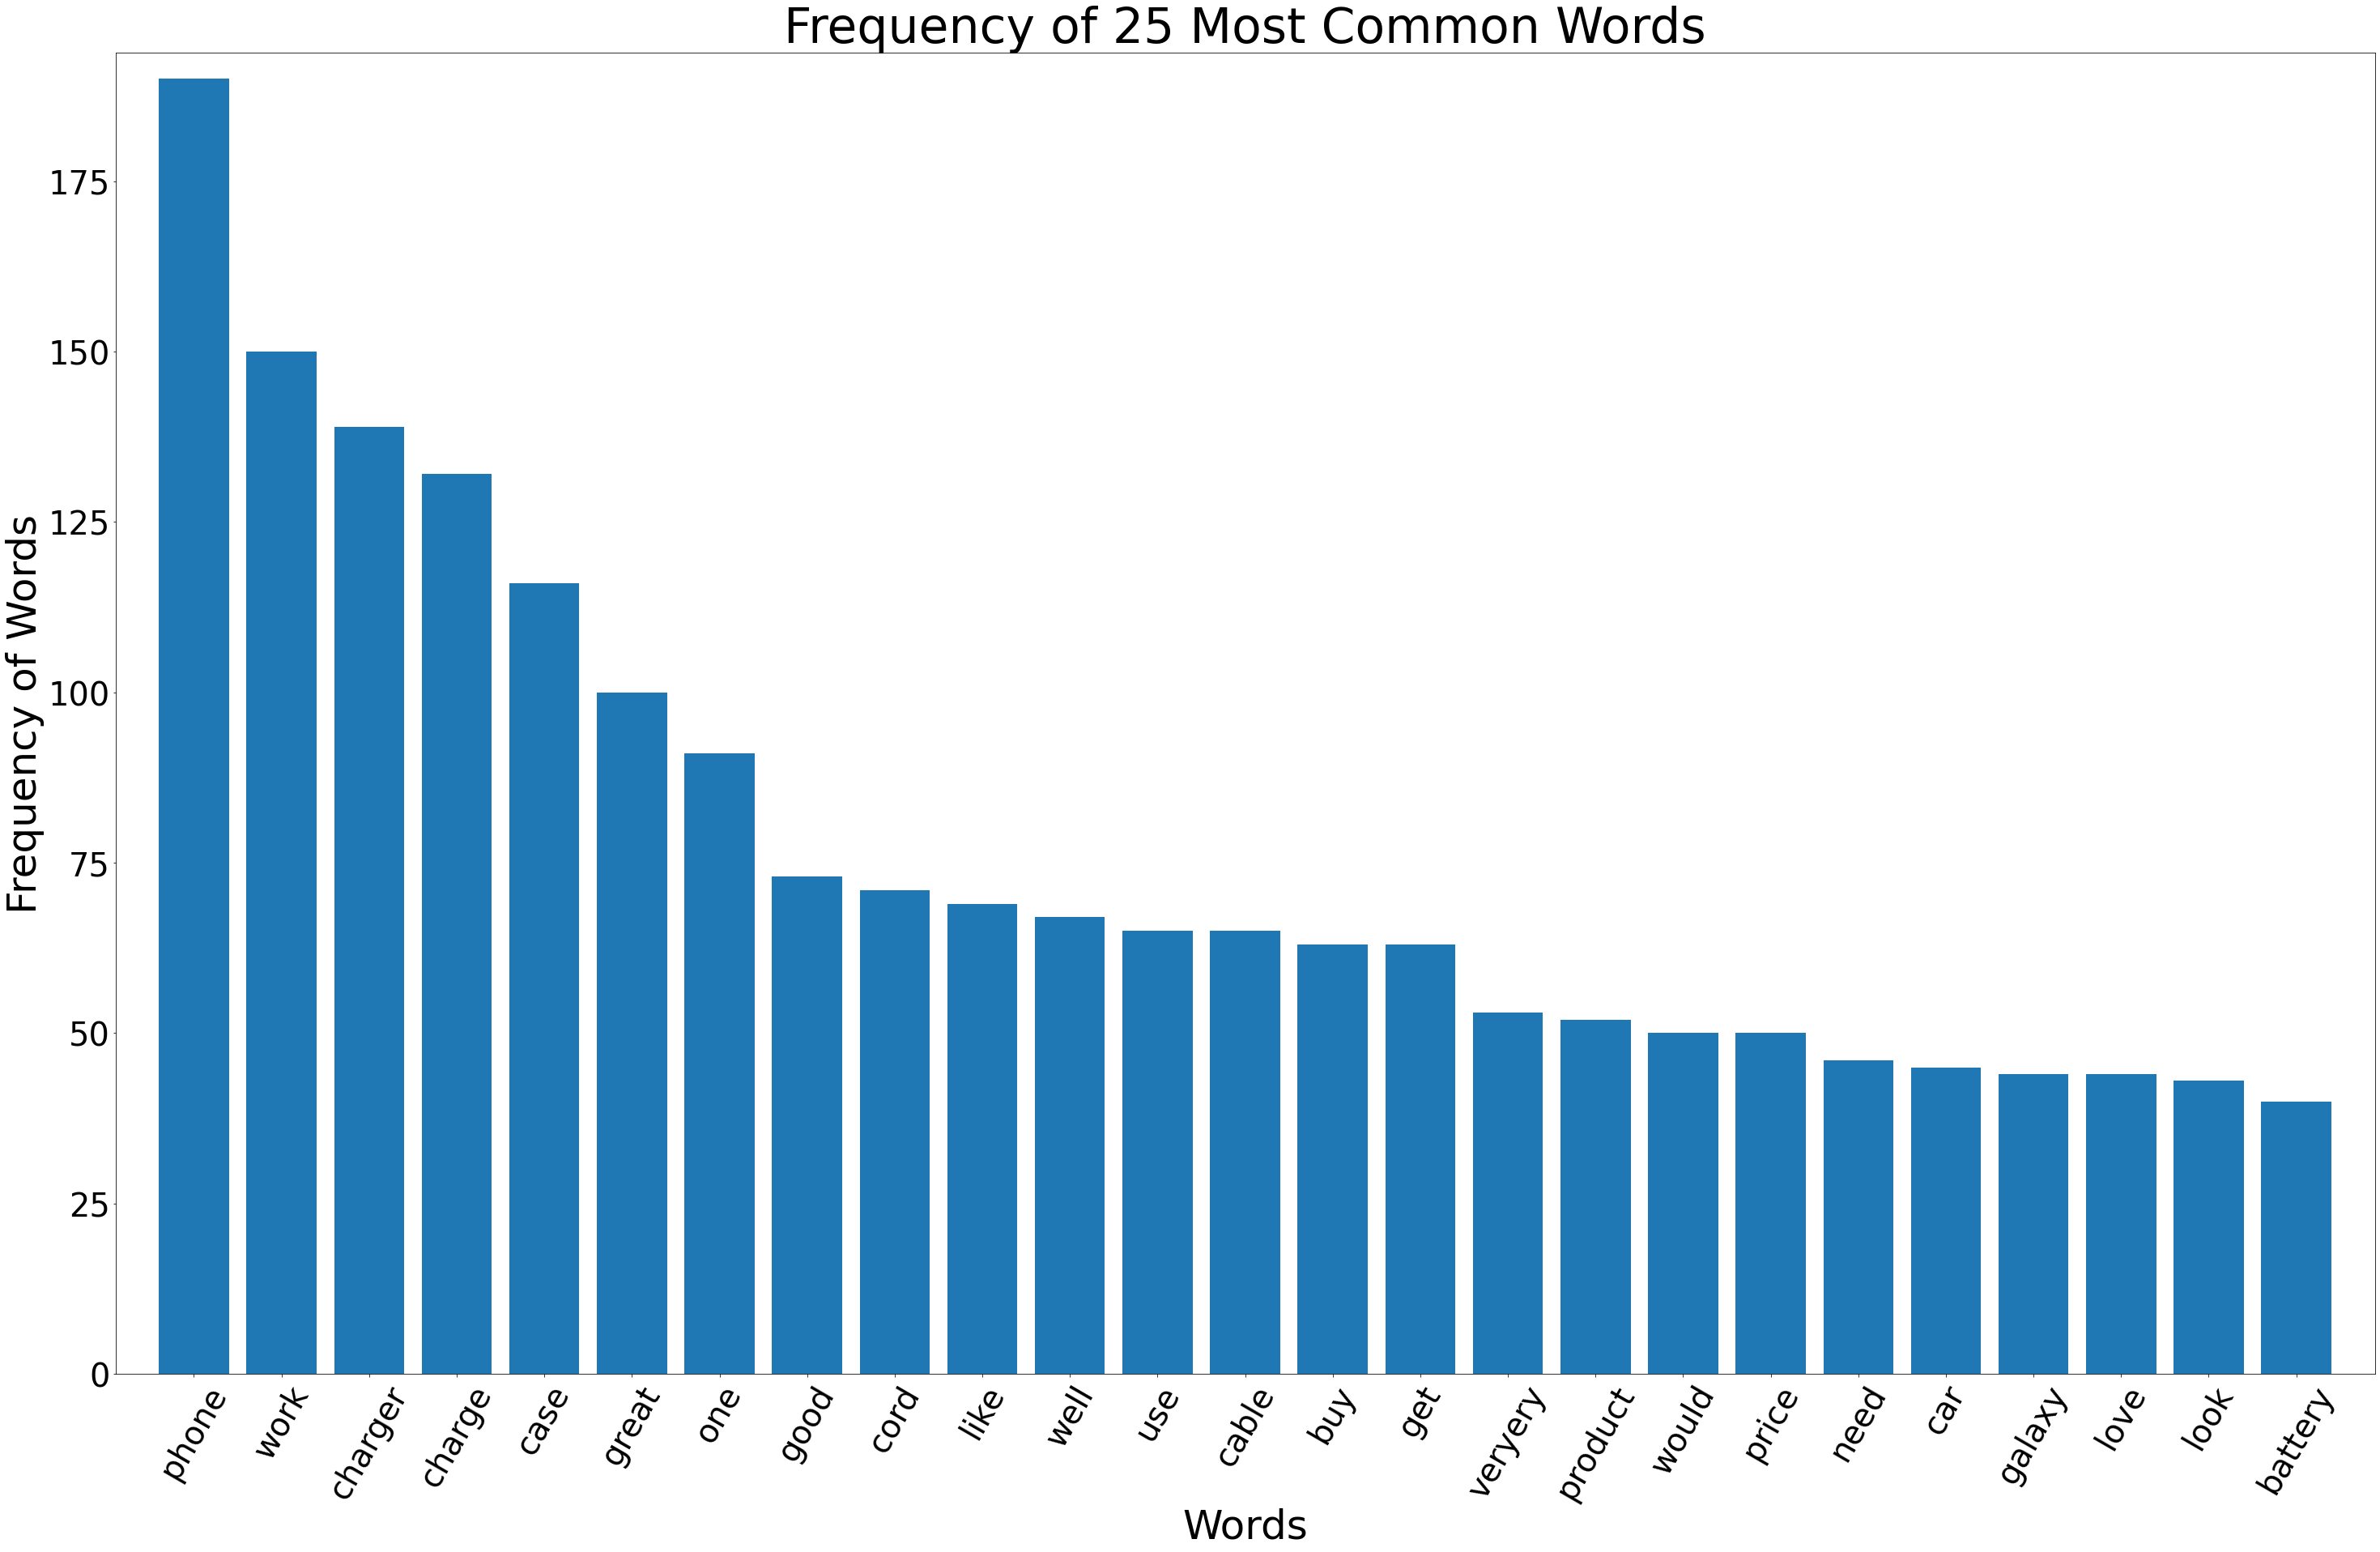

In [55]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

It seems the most common words for reviews where the rating = 1 had something to do with the “need”, “case”, “Phone”. We have to be careful when interpreting these results as there are only (9%) reviews with a rating of 1 based on our pie chart printed above.

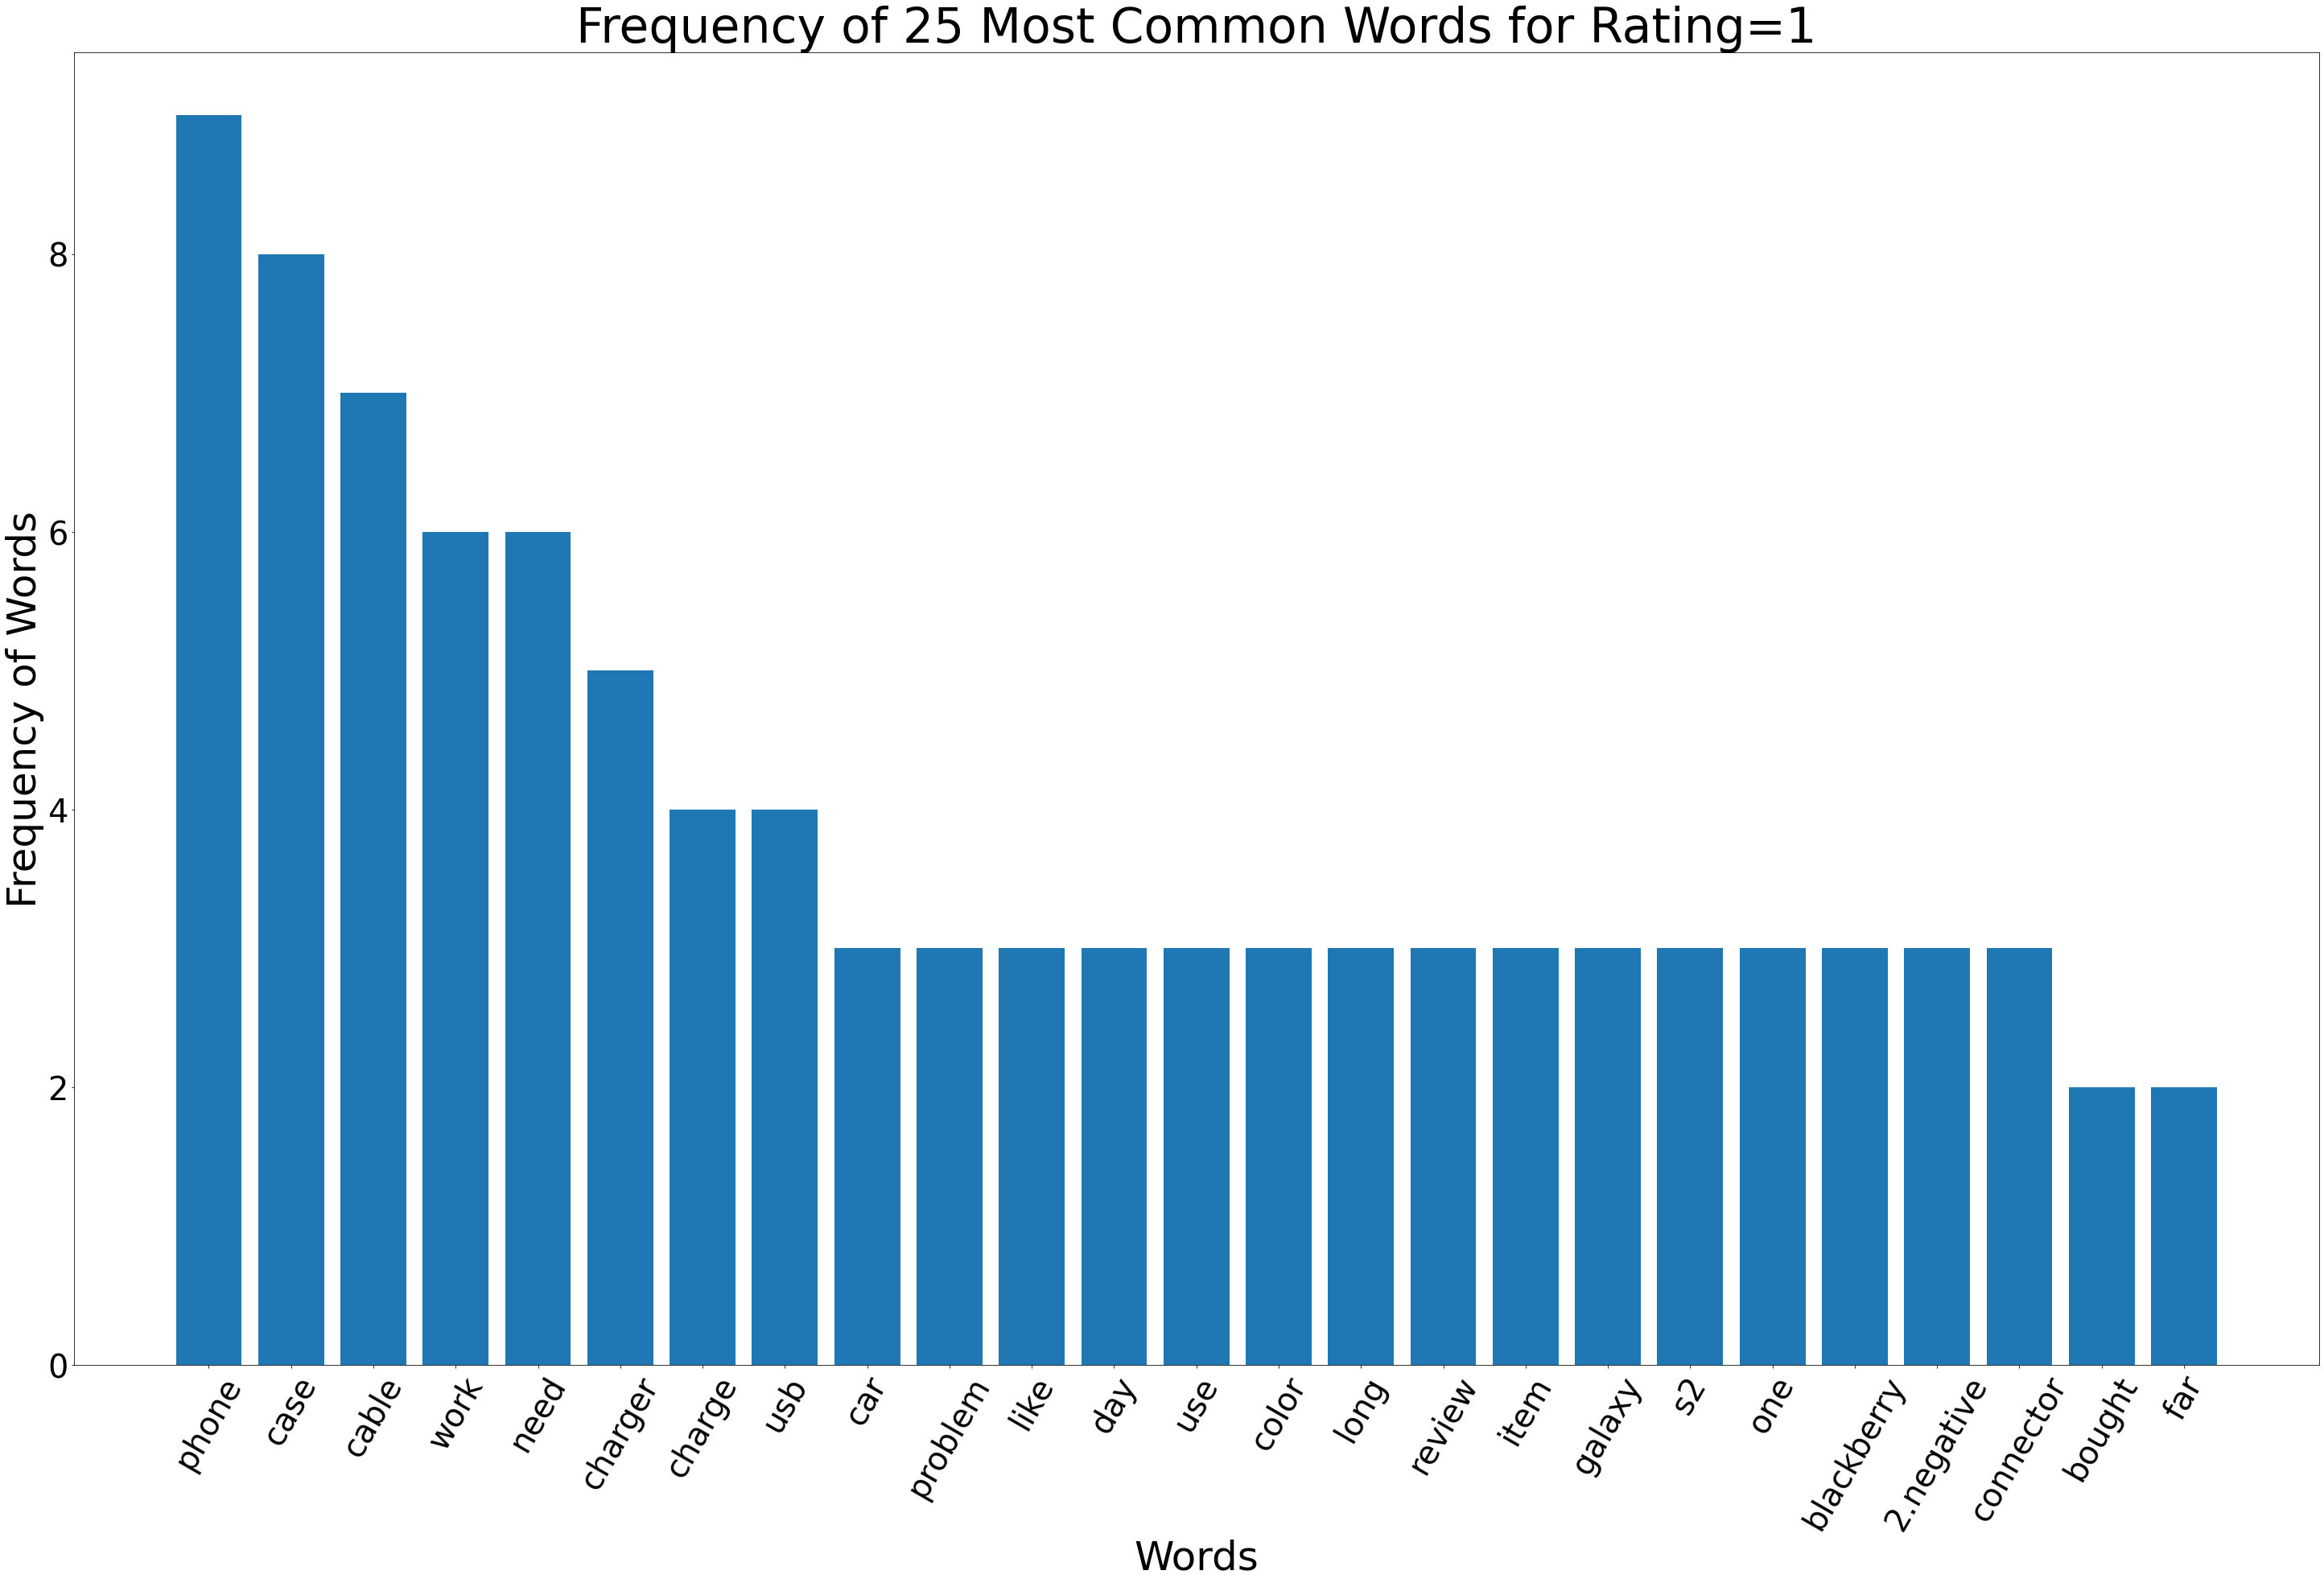

In [61]:
import collections
from collections import Counter
group_by = df.groupby('rating')['lemmatized_string'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

Reviews with a rating of 2 had a common theme of “phone”, “work”. Once again the rating distribution is very skewed but this does give us some clues on ways to improve the product.

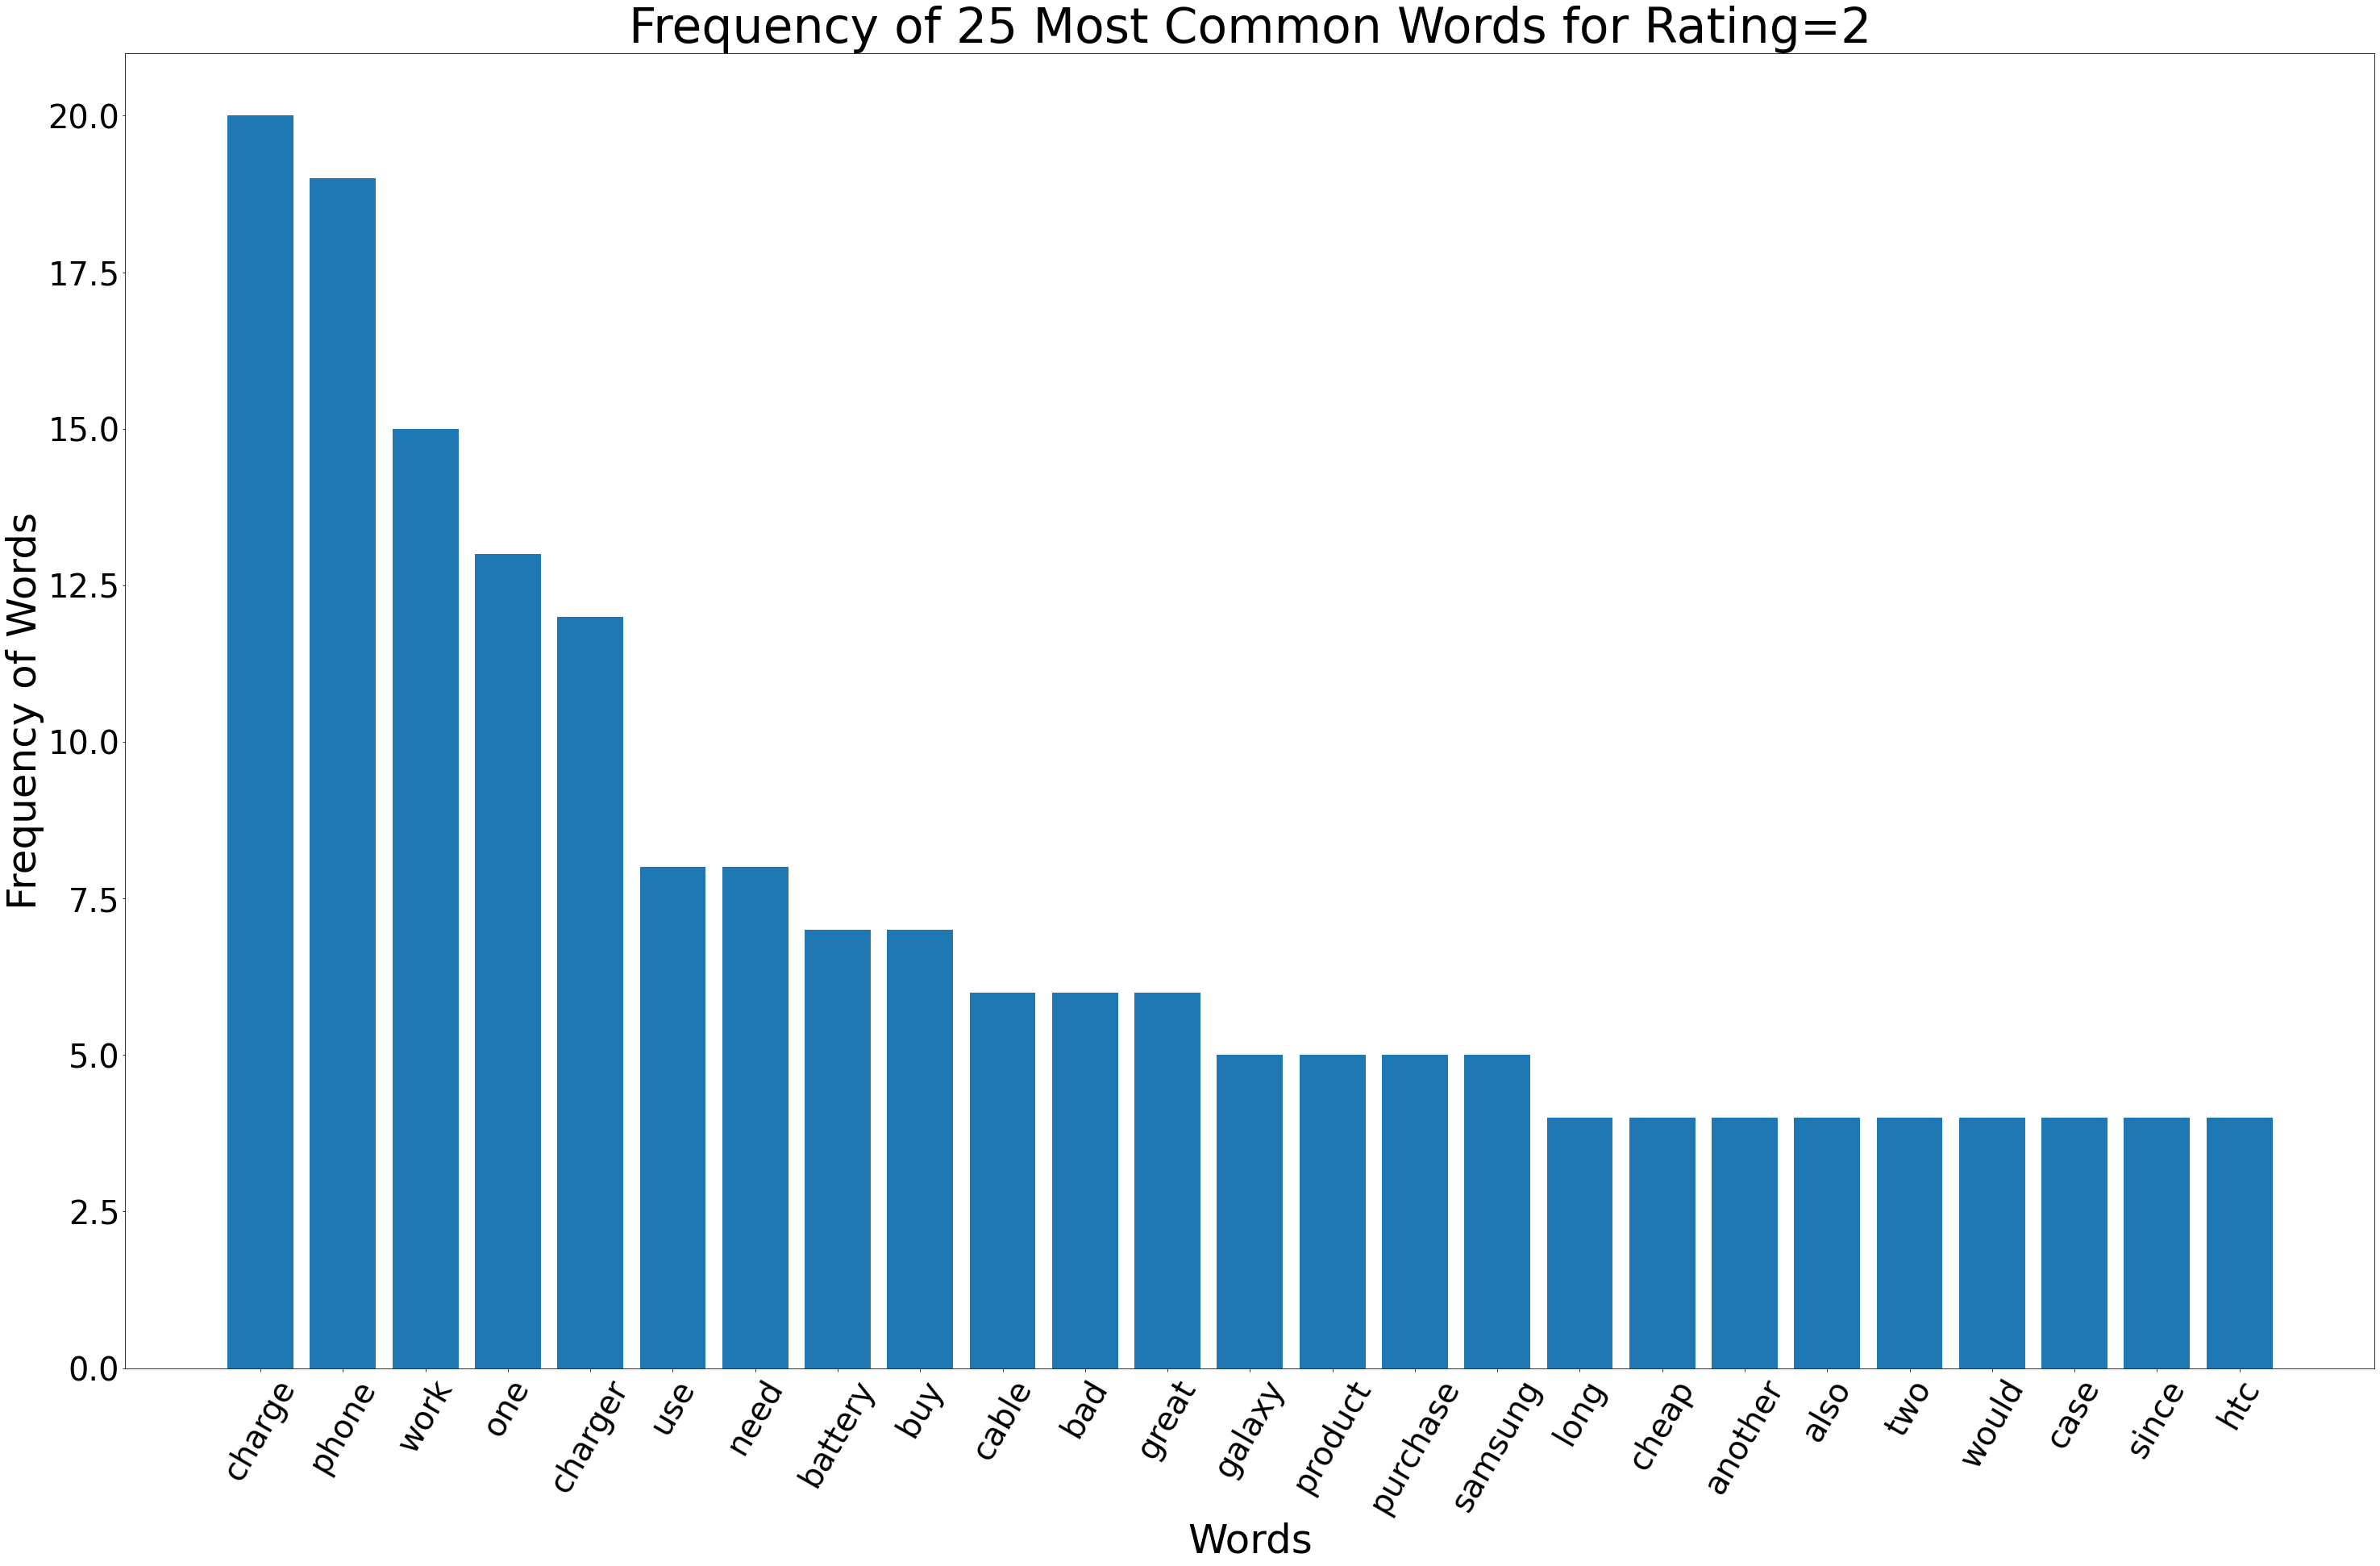

In [62]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()

It is difficult to derive accurate insights from a “neutral” rating as the employee didn’t have anything overly positive or negative to say about the company. That said, it is interesting that “charge” has once again crept into the top 10 words. So far roughly 20% of the employees had a negative or neutral (didn’t have anything good or bad to say) about the management at Google. Words like “work” and “phone” seem to be skewing the distribution for all ratings, it would be a good idea to remove these words from future analysis.

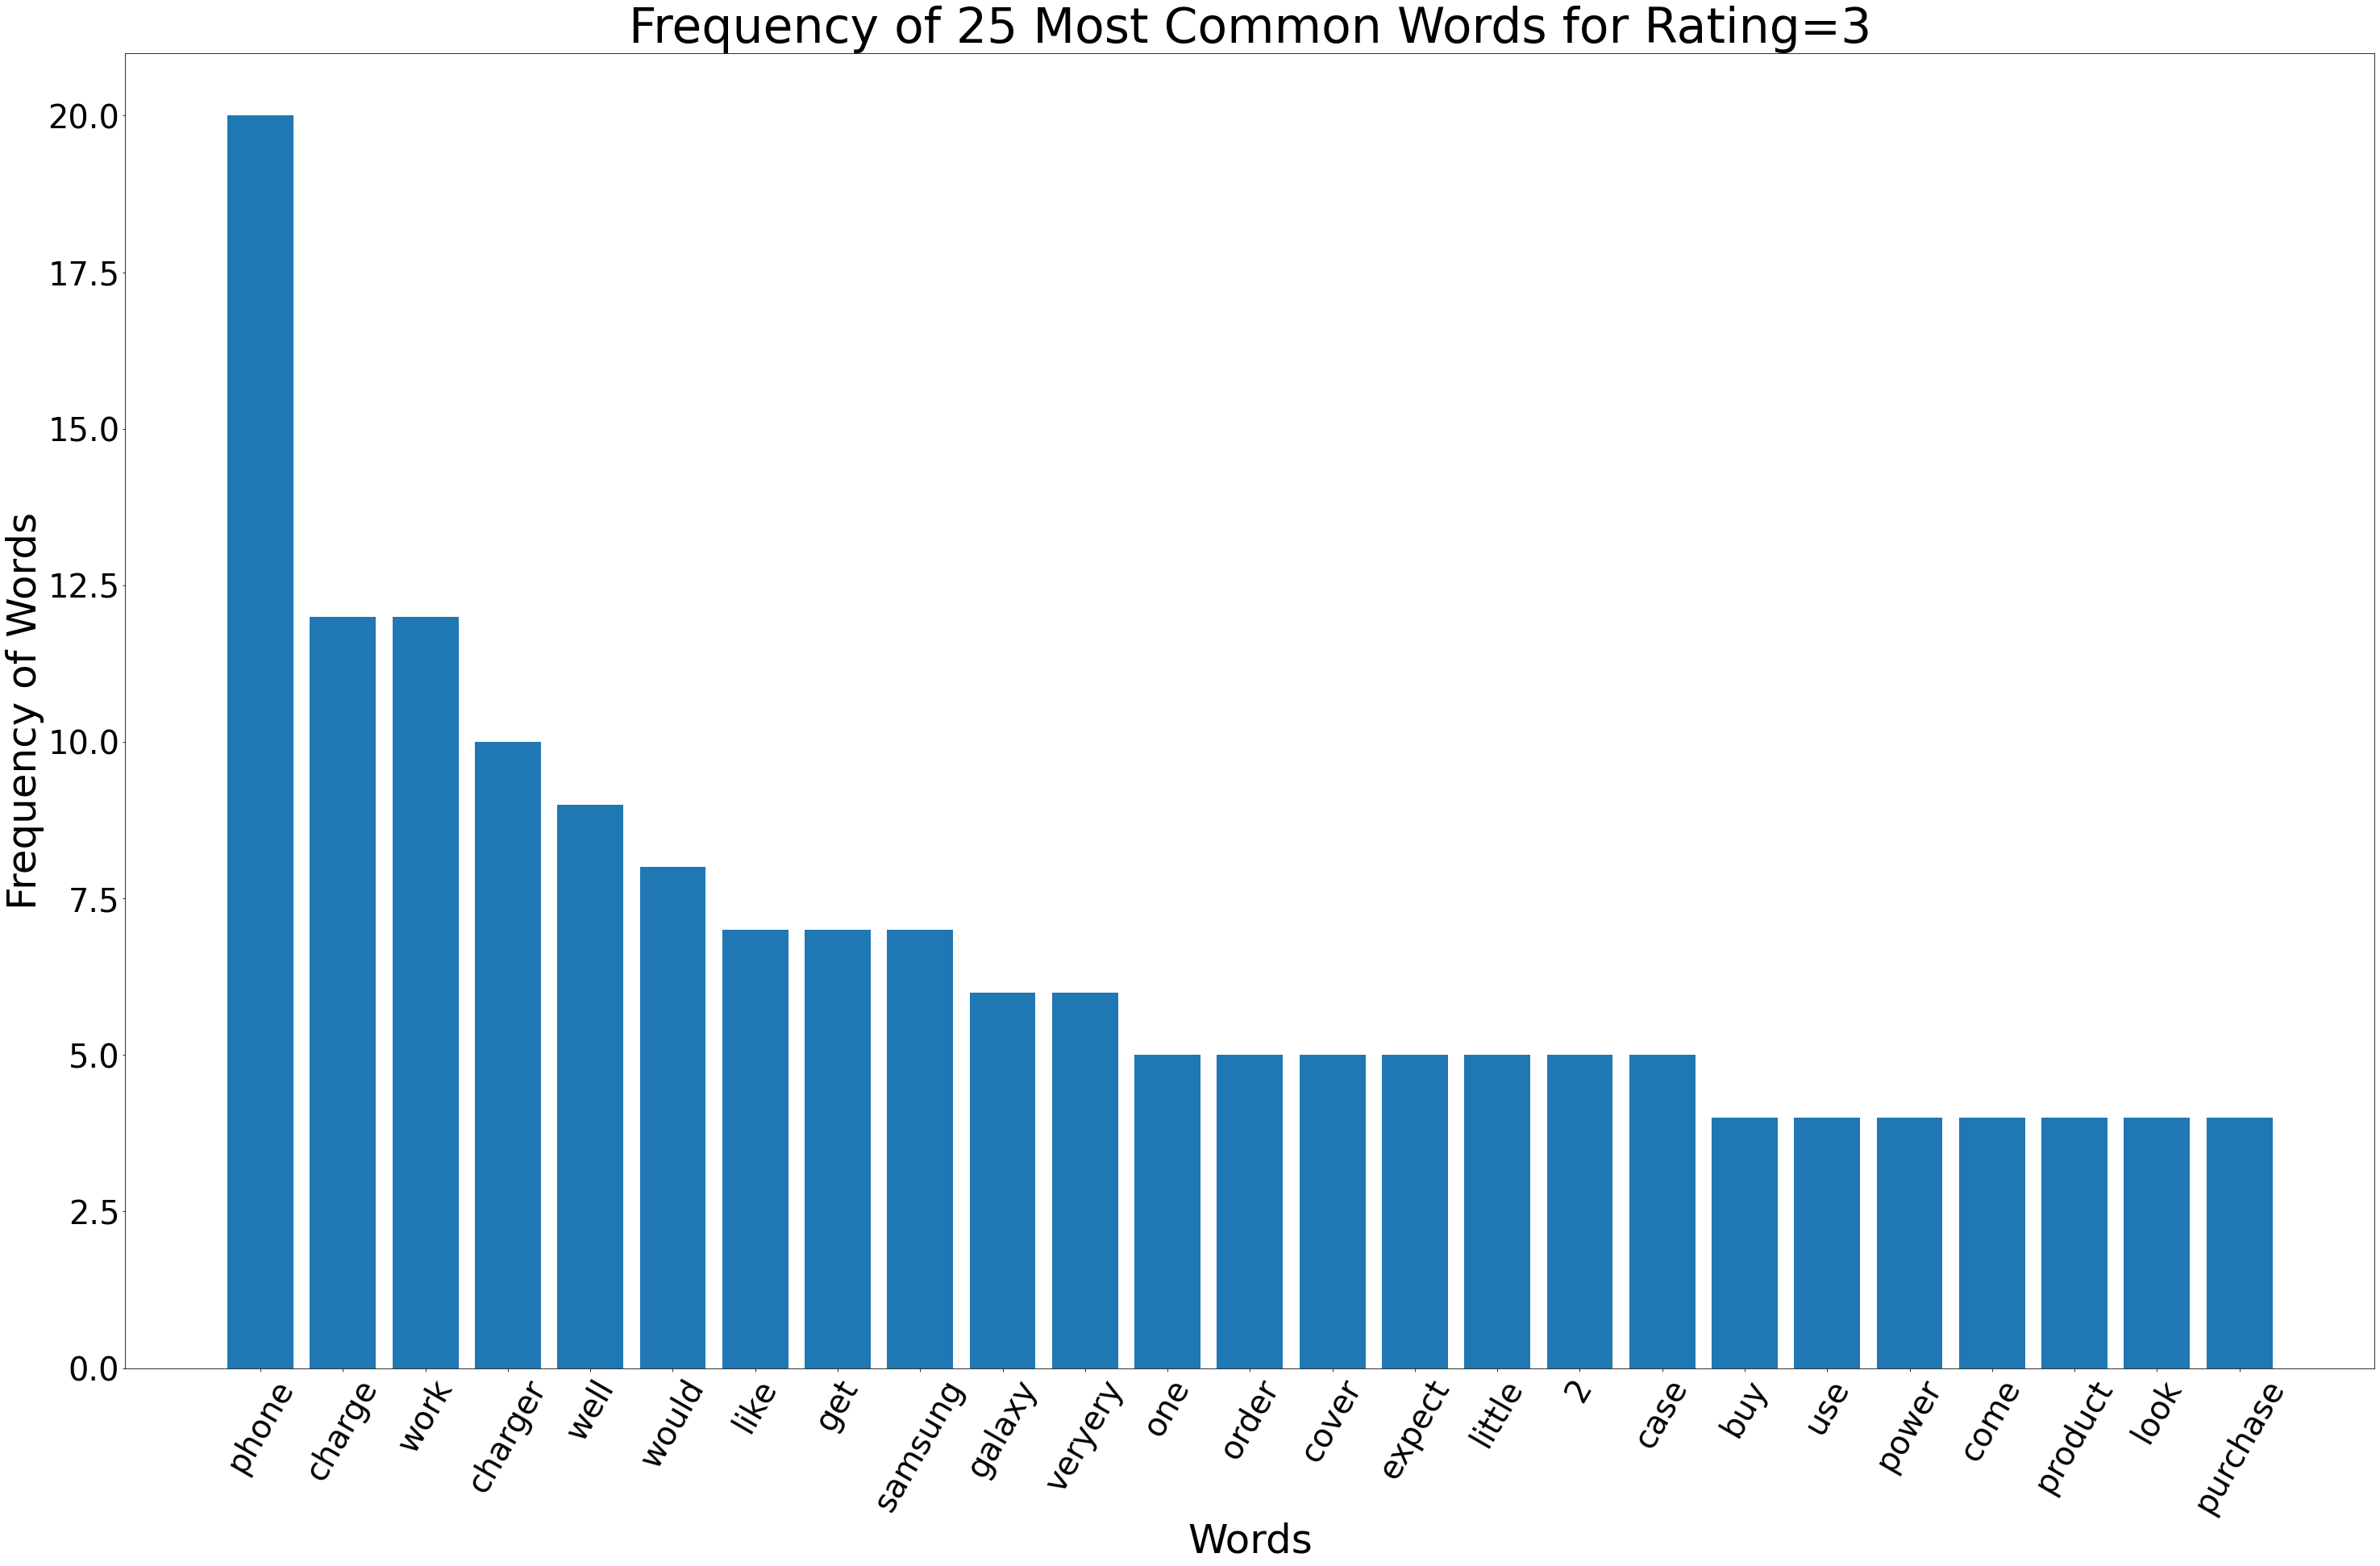

In [63]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()

Rating of 4 and 5 had very similar terms as it seems consumers liked the product and the price. This is very insightful as it helps to validate the results from ratings 1, 2, and 3. Last but not least, these word frequencies (ie. ratings 4 & 5) have been derived from a very large number of reviews which only adds to the validity of these results; management is certainly an area of improvement.

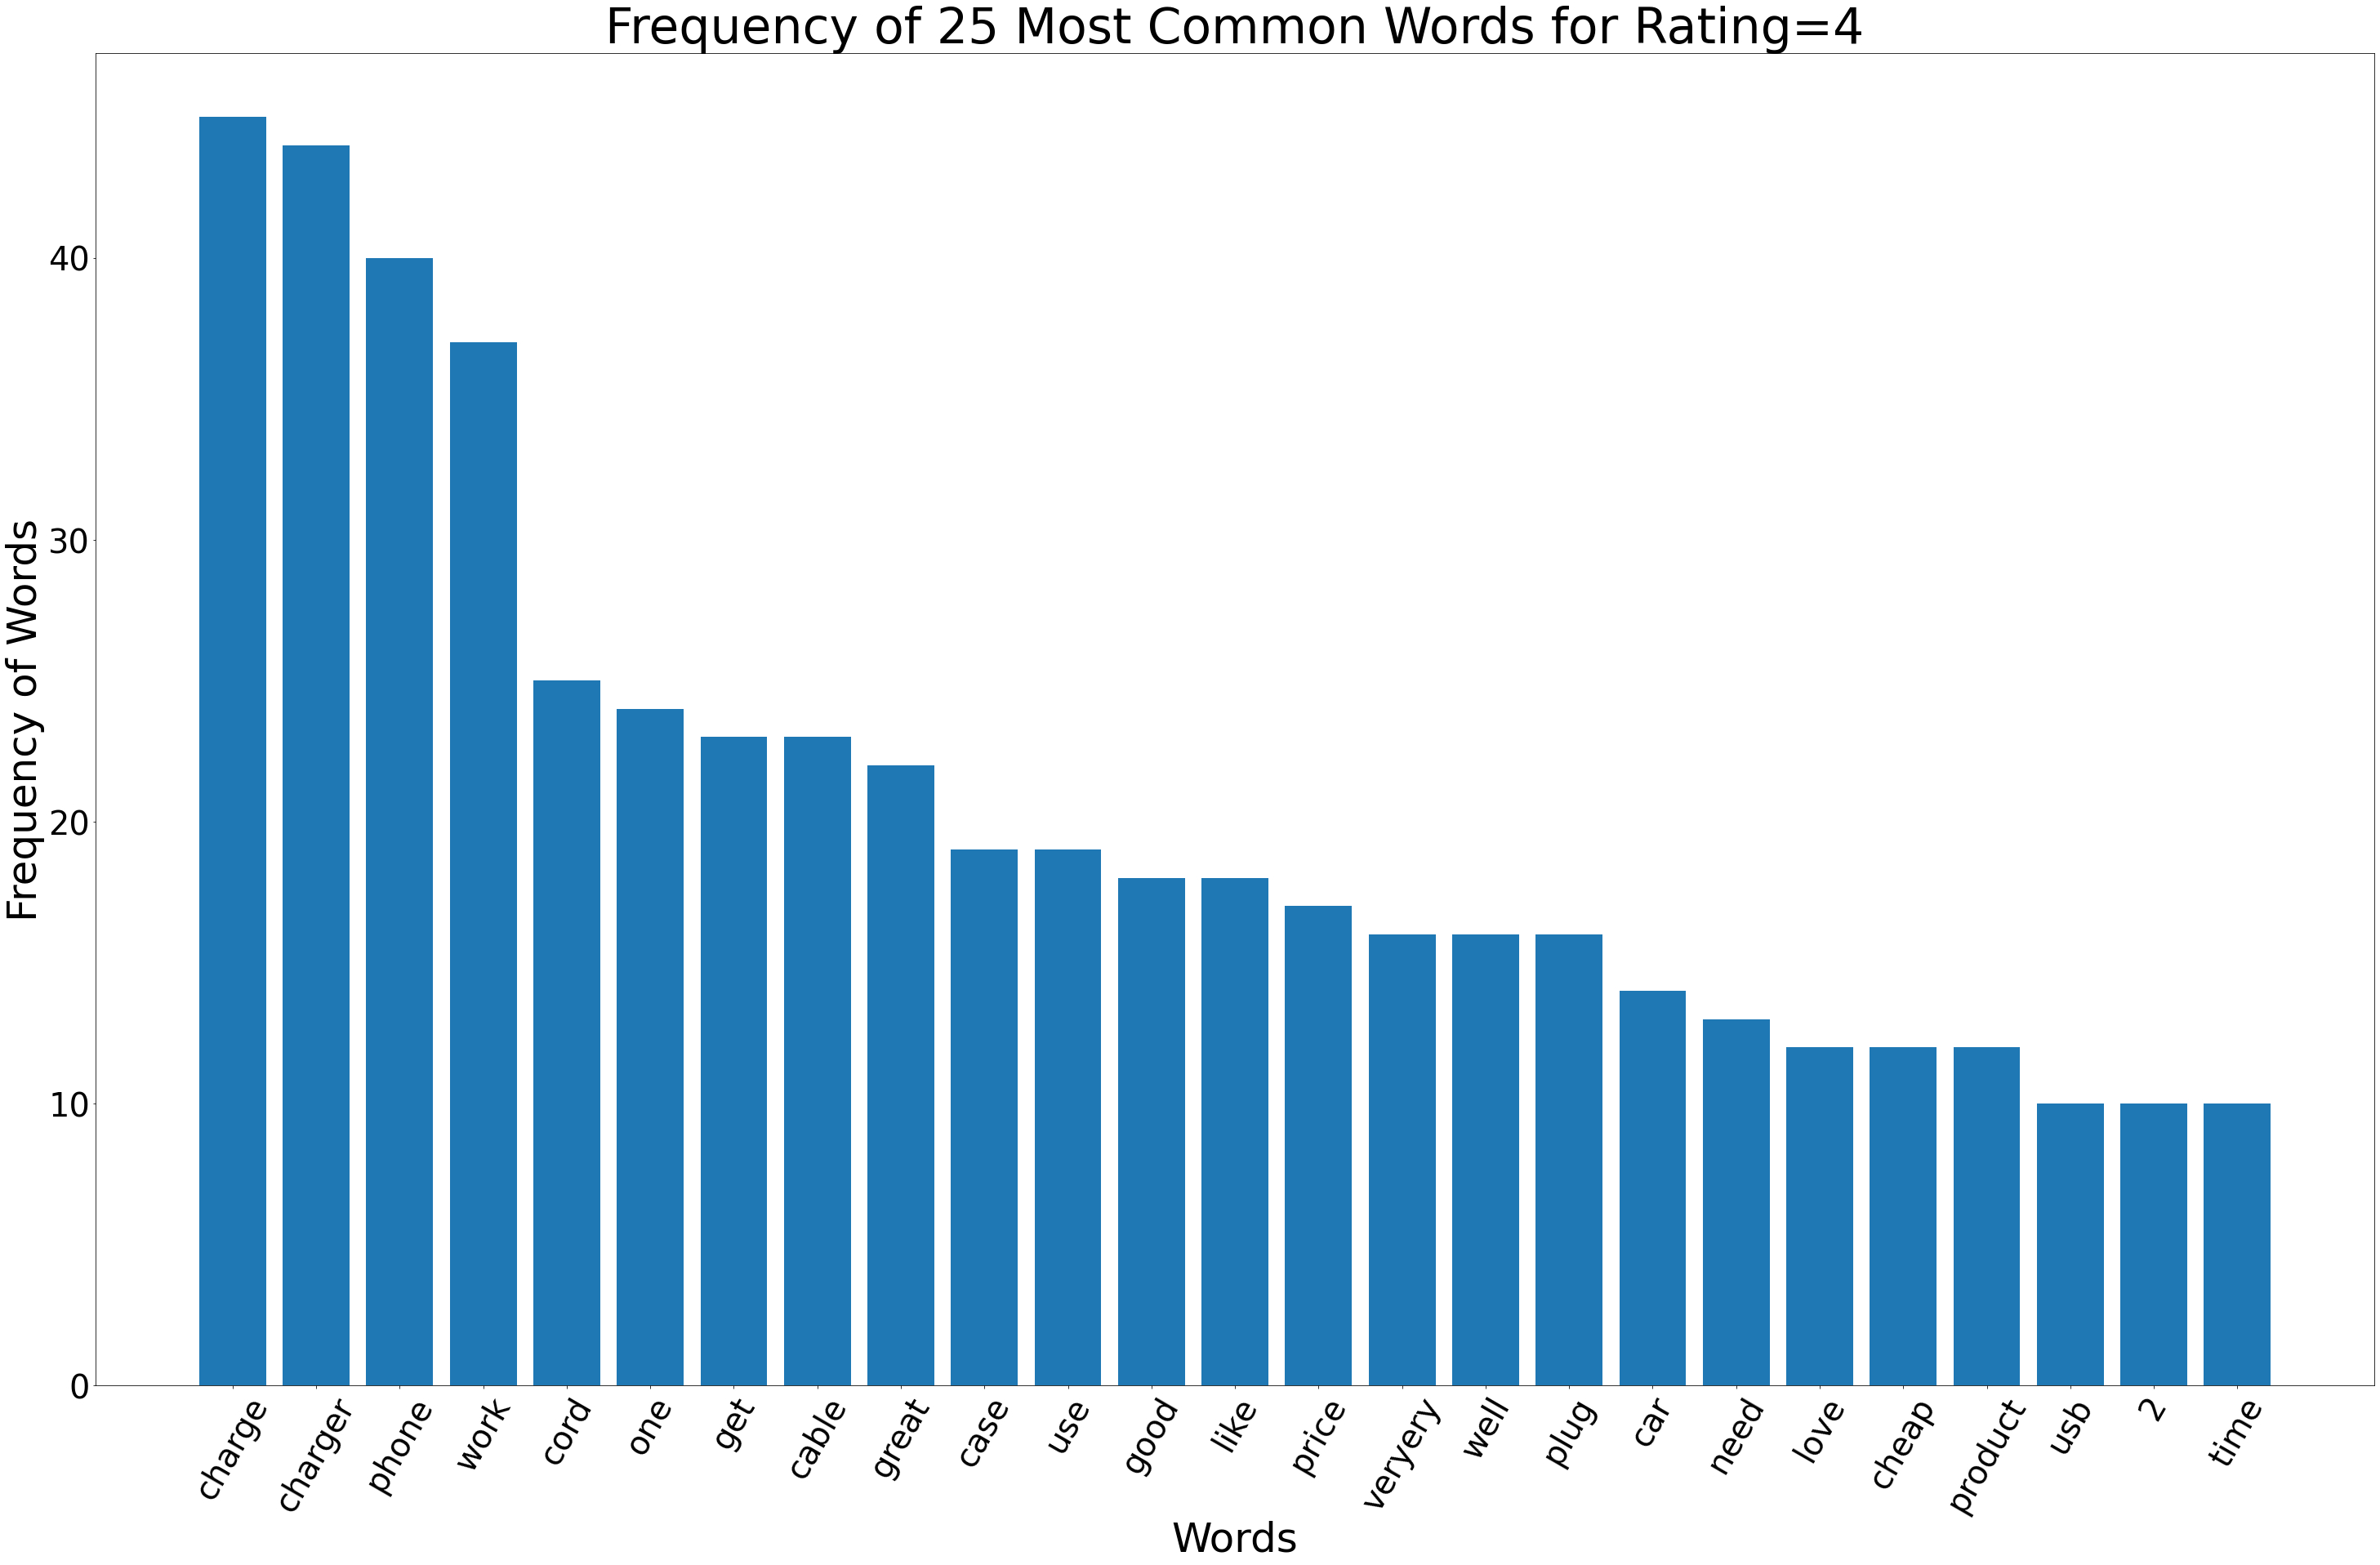

In [64]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()

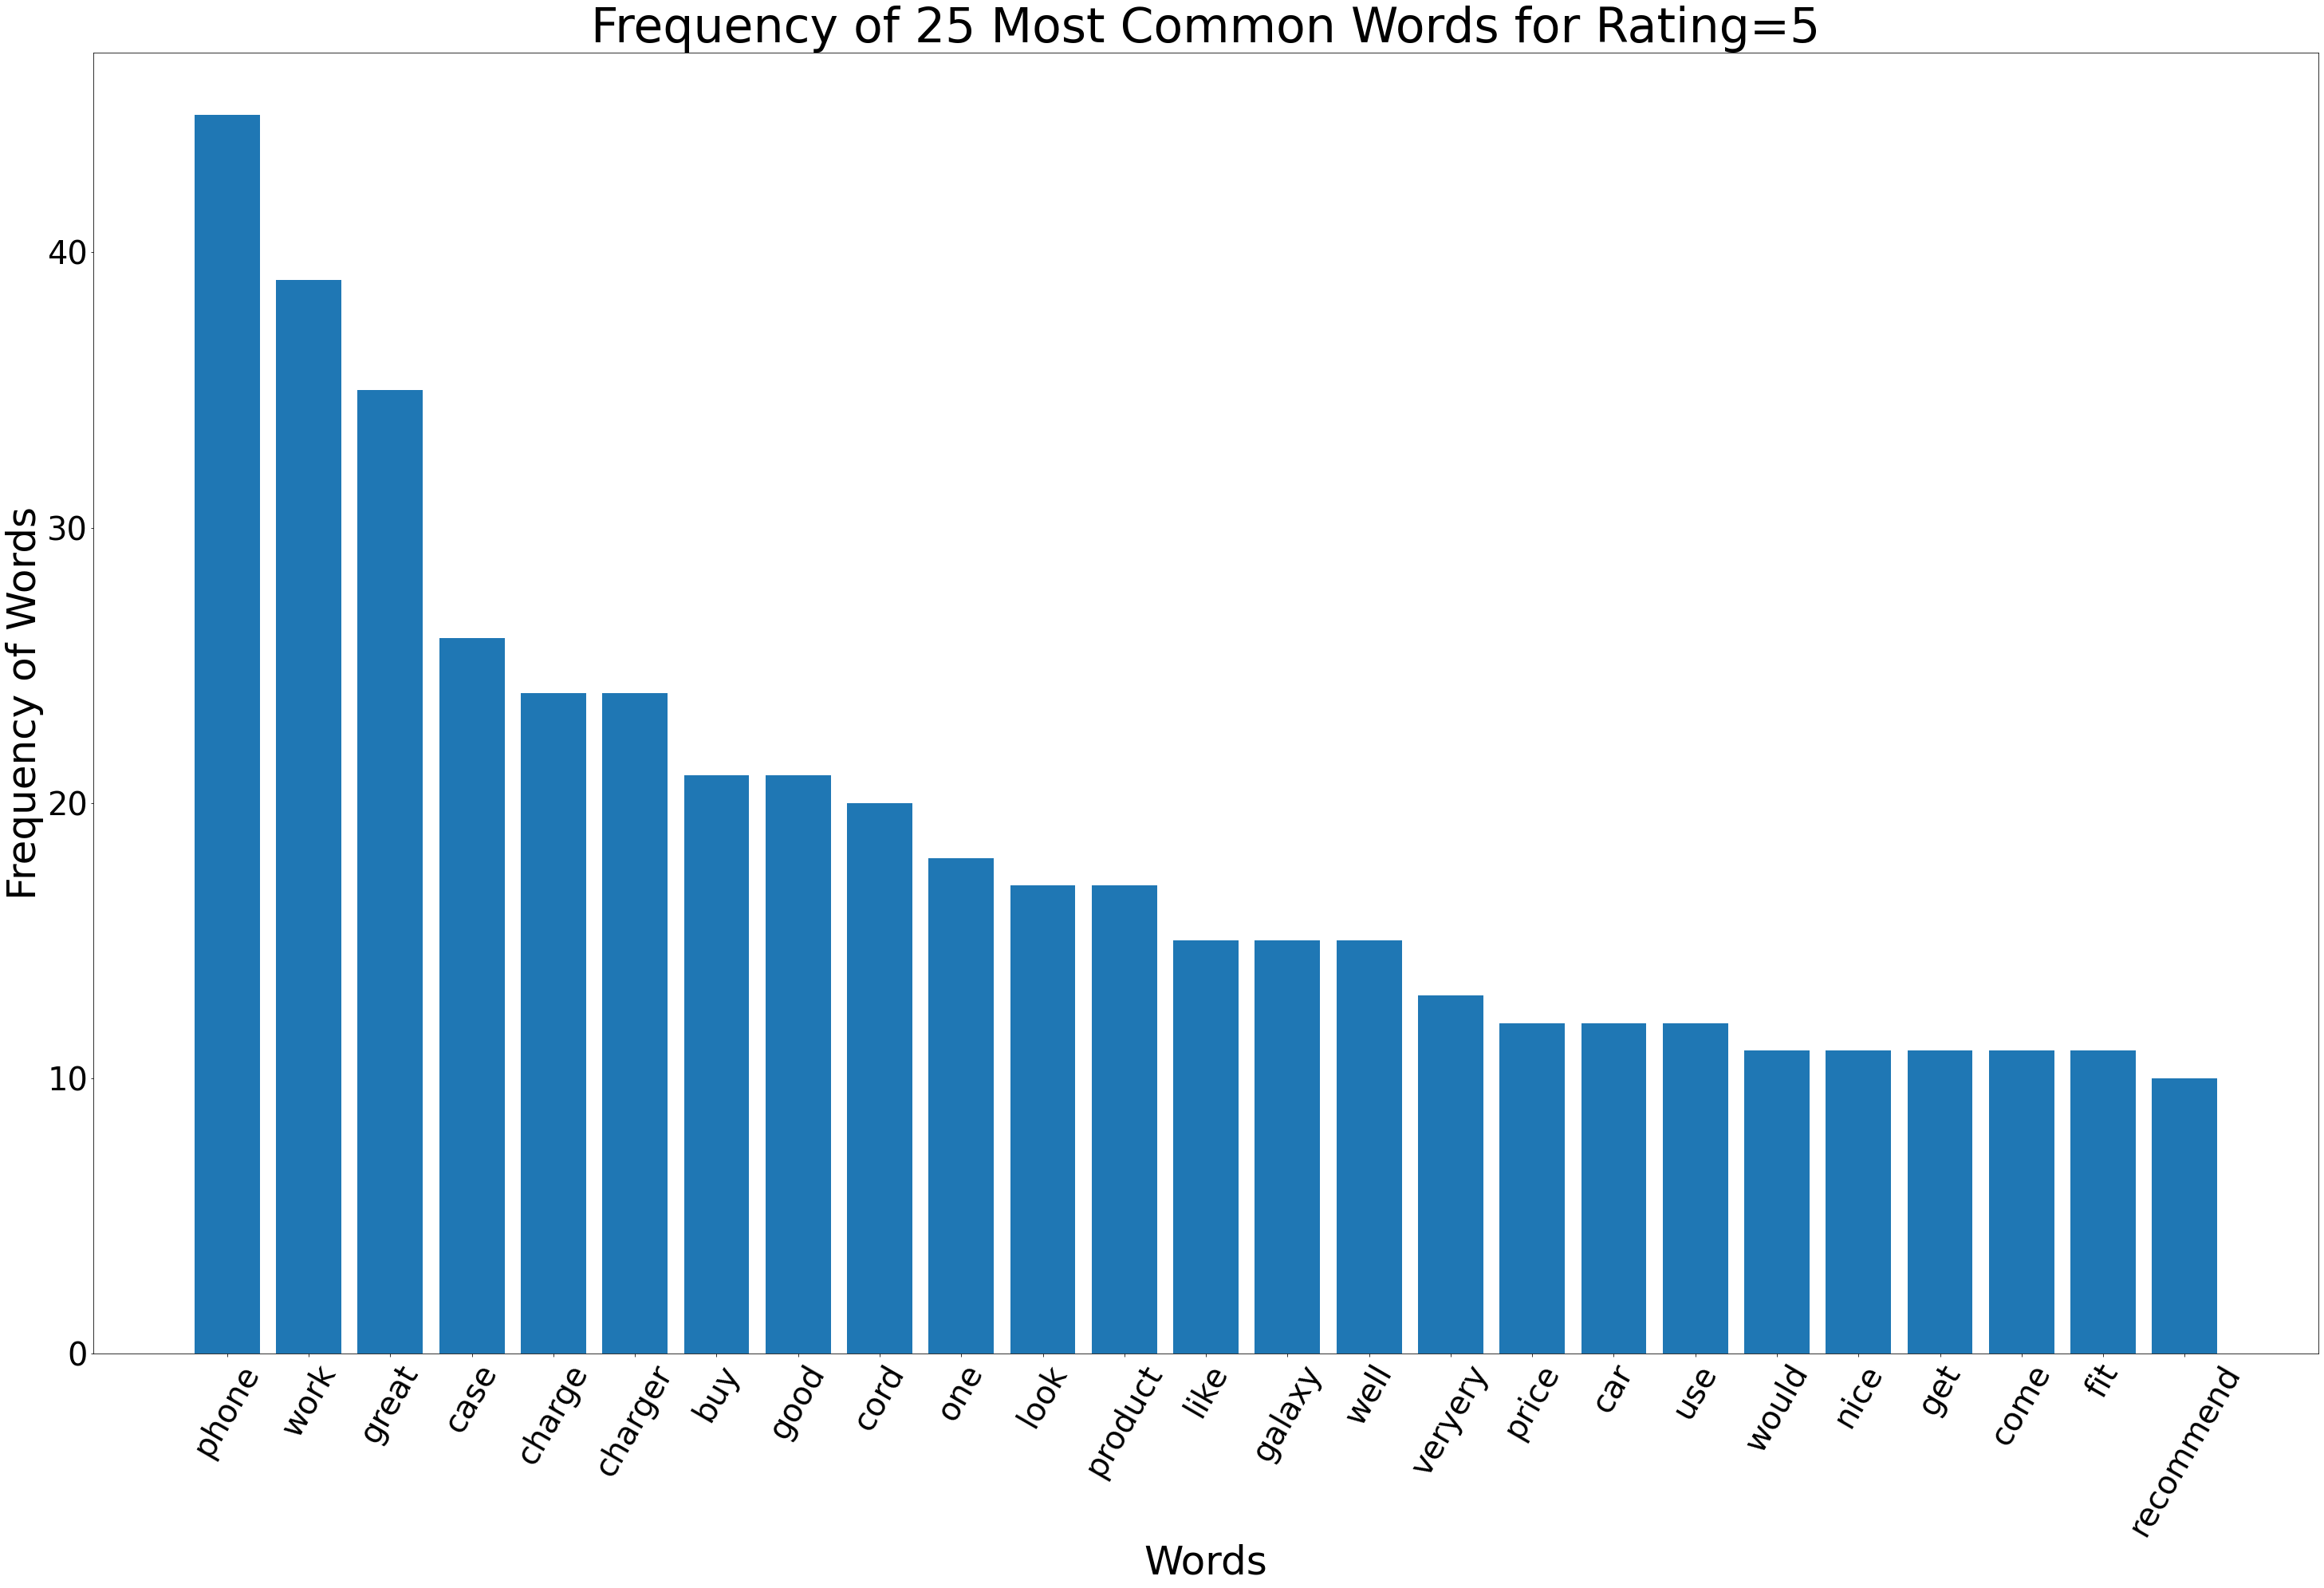

In [65]:
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()

**CountVectorizer**

The CountVectorizer method of vectorizing tokens transposes all the words/tokens into features and then provides a count of occurrence of each word. The result is called a document term matrix, which you can see below.
First, we create the vectorizer object. Max_df=0.9 will remove words that appear in more than 90% of the reviews. Min_df=25 will remove words that appear in less than 25 reviews. Next, we create the spare matrix as the result of fit_transform(). Finally, we create a list of all the words/features. The result is our document term matrix. Each row represents individual employee reviews and counts of how many times each word/feature occurs in each review.


In [67]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemmatized_string'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,also,battery,buy,cable,car,case,charge,charger,cheap,come,...,product,purchase,recommend,samsung,time,use,veryery,well,work,would
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


**TF-IDF**

Instead of using the simple CountVectorizer method to vectorize our words/tokens, we’ll use the TF-IDF (Term Frequency — Inverse Document Frequency) method. The TF-IDF method helps to bring down the weight/impact of high-frequency words (ie. “work”, “Phone” and ‘charge” in our case).
Much like the CountVectorizer method we first create the vectorizer object. Max_df=0.9 will remove words that appear in more than 90% of the reviews. Min_df=25 will remove words that appear in less than 25 reviews. Next, we create the spare matrix as the result of fit_transform(). Finally, we create a list of all the words/features.
 


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_string'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,also,battery,buy,cable,car,case,charge,charger,cheap,come,...,product,purchase,recommend,samsung,time,use,veryery,well,work,would
0,0.0,0.0,0.296175,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.329703,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.448708,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.342511,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.377076,...,0.000000,0.000000,0.0,0.0,0.345245,0.000000,0.0,0.0,0.000000,0.313414
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.621544,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.749539,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.661960,0.000000
295,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.304156,0.0,0.0,0.225927,0.000000
296,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
297,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.354389,0.0,0.0,0.263241,0.000000


Lastly, we are going to save this work into a csv file for further data analysis

In [ ]:
rws.to_csv('/content/clean.csv')

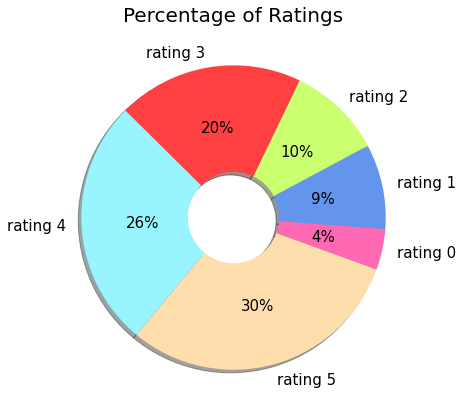

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
colors = ( "#FF69B4", "#6495ED", "#CAFF70","#FF4040", "#98F5FF", "#FFDEAD")
# Creating dataset
ratings = ['rating 0', 'rating 1', 'rating 2','rating 3', 'rating 4', 'rating 5']
 
data = [13, 27, 30, 59, 79, 91]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ratings,shadow = True,colors = colors, wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})
plt.title('Percentage of Ratings', fontsize=20)

# show plot
plt.show()


**Word Embedding Technique**

Now, before we use the machine learning to further implementing the sentiment analysis, we need to turn those texts into numerical values, this is known as vector representative for the words. To do this, there are many techniques. Let looks at some of them.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

**Bag of words**
This is one of the most widely known technique for turning text into numbers. This technique considers words in the sentence and ignore their order as it focus on frequency of each word. To apply this technique, we can use CountVectorizer from sklearn.

In [ ]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train)
X_train_bow = cv.fit_transform(train['text'])
X_test_bow = train['label']
Y_train_bow = cv.transform(test['text'])
Y_test = test['label']

**TF-IDF**

This technique calculates how important the word is in the document. TF, the Term Frequency, measures frequency of a term in each document. IDF, the Inverse Document Frequency, measures how important is the term across all documents. Then two values get multiply, TF*IDF, and we find out how important each word is in the document. To apply this technique, we can use TdidfVectorizer from sklearn.

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['text'])
X_test_tfidf = train['label']
Y_train_tdidf =vectorizer.transform(test['text'])

**Hashing**

With hash, text context will be turn into hash value like bit-size value where each context will be calculated and assigned a unique value. The algorithms are designed for collision-resistant, this mean low probability of producing different value for same text. To apply this technique, we can use HashingVectorizer from sklearn.

In [ ]:
# 3.3 Hashing
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['text'])
X_test_hash = train['label']
Y_train_hash = hv.transform(test['text'])

**Selecting model and run accuracy Test**

To measure the accuracy of the prediction, one of the simplest technique is the accuracy test. With this, we can see, for example, out of 100 predictions that the model need to predict, how many times it predicts correctly.

Another technique that we can used is precision and recall. Let’s look at how these values are calculated. First, refer to the confusion matrix. We need to understand the following terms and their calculation.

**True positives (TP):** When actual positive is correctly classified as positive.

**True negatives (TN):** When actual negative is correctly classified as negative.

**False positives (FP):** When actual negative is incorrectly classified as positive.

**False negatives (FN):** When actual positive is incorrectly classified as negative.

Next, once we know these values, we can calculate the precision and recall as follow:

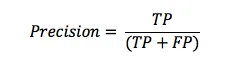

Precision, or positive predicted value, refers to the amount of correctly positive predicted over total number of positive predicted.

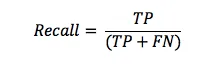

Recall, or sensitivity, refers to the amount of correctly positive predicted over actual amount of true positive. Now, let see how our model is doing with the prediction of the test data.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.4)
ridge.fit(X_train_tfidf, X_test_tfidf)
test['sentiment_pred'] = ridge.predict(Y_train_tdidf)
y_true = test['label']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)

0.7333333333333333

With this model, we received 0.666666666 accuracy for the prediction!

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_true, y_pred, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.56      0.24      0.33        21
Good Reviews       0.76      0.93      0.83        54

    accuracy                           0.73        75
   macro avg       0.66      0.58      0.58        75
weighted avg       0.70      0.73      0.69        75



Text(23.999999999999996, 0.5, 'Actual')

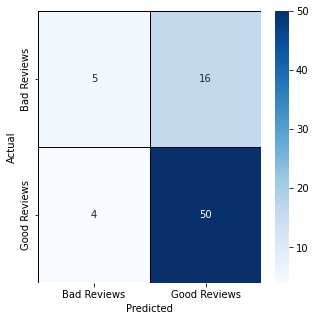

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")